# HW6

In this task you are suggested to implement gradient descent and Newton's optimization methods, and investigate their performance for three types of functions:

* quadratic function
* loss function of linear regression
* loss function of logistic regression

`BaseSmoothOracle` is an abstract class for objective function $f$ (**oracle**). Each concrete oracle must inherit this class, implementing four methods:

* `func(x)` calculates $f(\boldsymbol x)$
* `grad(x)` calculates $\nabla f(\boldsymbol x)$
* `hess(x)` calculates $\nabla^2 f(\boldsymbol x)$
* `get_opt(x)` calculates point of minimum by direct formula (works only for quadratic and linear regression oracles)

In [1]:
class BaseSmoothOracle(object):
    """
    Base class for implementation of oracles.
    """
    def func(self, x):
        """
        Computes the value of function at point x.
        """
        raise NotImplementedError('Func oracle is not implemented.')

    def grad(self, x):
        """
        Computes the gradient at point x.
        """
        raise NotImplementedError('Grad oracle is not implemented.')
    
    def hess(self, x):
        """
        Computes the Hessian matrix at point x.
        """
        raise NotImplementedError('Hessian oracle is not implemented.')
        
    def get_opt(self):
        """
        Computes the point x at which minimum is attained
        """
        raise NotImplementedError('True solution is unavailable.')

## Quadratic oracle

```{math}
:label: quadratic-oracle-2
    f(\boldsymbol x) = \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T} \boldsymbol x, \quad \boldsymbol A^\mathsf{T}  = \boldsymbol A \in \mathbb R^{n\times n}, \quad \boldsymbol b\in\mathbb R^n
```

### Task 6.1 (0.5 points)

Let $\boldsymbol A$ be a symmetric positive definite matrix. Solve the optimization task

$$
    \frac 12 \boldsymbol x^\mathsf{T} \boldsymbol{Ax} - \boldsymbol b^\mathsf{T}\boldsymbol x \to \min\limits_{\boldsymbol x \in \mathbb R^n}
$$

analytically.

#### YOUR SOLUTION HERE

### Task 6.2 (0.5 points)

Implement quadratic oracle {eq}`quadratic-oracle-2`.

In [6]:
import numpy as np

class QuadraticOracle(BaseSmoothOracle):
    """
    Oracle for quadratic function:
       func(x) = 1/2 x^TAx - b^Tx.
    """

    def __init__(self, A, b):
        if not np.allclose(A, A.T):
            raise ValueError('A should be a symmetric matrix.')
        self.A = A
        self.b = b

    def func(self, x):
        return 0.5 * np.dot(self.A.dot(x), x) - self.b.dot(x)

    def grad(self, x):
        return self.A.dot(x) - self.b

    def hess(self, x):
        return self.A 
    
    def get_opt(self):
        return np.linalg.inv(self.A).dot(self.b)

Plot levels of a quadratic function:

In [7]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

def plot_levels(func, xrange=None, yrange=None, levels=None):
    """
    Plotting the contour lines of the function.

    Example:
    --------
    >> oracle = QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
    >> plot_levels(oracle.func)
    """
    if xrange is None:
        xrange = [-6, 6]
    if yrange is None:
        yrange = [-5, 5]
    if levels is None:
        levels = [0, 0.25, 1, 4, 9, 16, 25]
        
    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))

    CS = plt.contour(X, Y, Z, levels=levels, colors='k')
    plt.clabel(CS, inline=1, fontsize=8) 
    plt.grid()   
    
# oracle = QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
# plot_levels(oracle.func, xrange=[-8, 8], yrange=[-8, 8])

## Linear regression oracle


### Task 6.3 (0.5 points)

Implement linear regression oracle

$$
    f(\boldsymbol x) = \frac 1m \Vert \boldsymbol{Ax} - \boldsymbol b\Vert_2^2, \quad \boldsymbol A \in \mathbb R^{m\times n}, \quad \boldsymbol b \in \mathbb R^n
$$

In [8]:
class LinRegOracle(BaseSmoothOracle):
    """
    Oracle for linear regression:
       func(x) = 1/m ||Ax - b||^2.
    """

    def __init__(self, A, b):
        self.A = A
        self.b = b

    def func(self, x):
        return np.linalg.norm(self.A.dot(x) - self.b)**2 / self.A.shape[0]

    def grad(self, x):
        return 2 / self.A.shape[0] * self.A.T.dot(self.A.dot(x) - self.b)

    def hess(self, x):
        return 2 / self.A.shape[0] * self.A.T.dot(self.A)
    
    def get_opt(self):
        return np.linalg.pinv(self.A).dot(self.b)

## Logistic regression oracle

```{math}
:label: log-reg-oracle-2
    f(\boldsymbol x) = \frac 1m \sum_{i=1}^m \log\big(1 + \exp(-b_i\boldsymbol a_i^\mathsf{T} \boldsymbol x)\big) + \frac C2\Vert \boldsymbol x\Vert_2^2
```

### Task 6.4 (0.5 points)

Show that {eq}`log-reg-oracle-2` is proportional to the loss function of {ref}`binary logistic regression <simple-log-reg>` model with targets denoted as $\pm 1$.

#### YOUR SOLUTION HERE

### Task 6.5 (1 point)

Find the gradient and hessian of logistic regression oracle {eq}`log-reg-oracle-2` in matrix-vector form.

#### YOUR SOLUTION HERE

### Task 6.6 (1 point)

Implement logistic regression oracle {eq}`log-reg-oracle-2`.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from scipy.special import expit

class LogRegOracle(BaseSmoothOracle):
    """
    Oracle for logistic regression.
    """

    def __init__(self, A, b, regcoef=1):
        self.A = A
        self.b = b
        self.C = regcoef

    def func(self, x):
        logits = self.b * self.A.dot(x)
        return 0.5 * self.C * np.linalg.norm(x)**2 + np.mean(np.logaddexp(np.zeros_like(self.b), - logits))

    def grad(self, x):
        return self.C * x - self.A.T.dot(self.b * expit(- self.b * self.A.dot(x))) / self.b.shape[0]

    def hess(self, x):
        s = expit(- self.b * self.A.dot(x))
        result = self.A.T.dot(np.diag(self.b * self.b * s * (1 - s))).dot(self.A) / self.b.shape[0] 
        return result + self.C * np.eye(x.shape[0]) 
    
    def get_opt(self):
        """
        Since there is no analytic solution for the optimal weights of logistic regression, 
        here we have to cheat a bit
        """
        LR = LogisticRegression(fit_intercept=False, C= 1./self.C/self.A.shape[0])
        LR.fit(self.A, (self.b + 1) / 2)
        return LR.coef_[0]

## Gradient descent

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or 

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 6.7 (1 point)

Implement gradient descent algorithm descrived above.

In [10]:
from datetime import datetime
from collections import defaultdict

def gradient_descent(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=10000,
                     trace=False, display=False):
    """
    Gradient descent optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively.
    x_0 : np.array
        Starting point for optimization algorithm.
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.
        Printing format and is up to a student and is not checked in any way.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        "success" or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time in seconds passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = gradient_descent(oracle, np.zeros(5))
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1):     
        grad_at_x_k = oracle.grad(x_k)
        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).microseconds * 1e-6)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        if np.linalg.norm(grad_at_x_k) <= np.sqrt(tolerance) * np.linalg.norm(grad_at_x_0):
            return x_k, 'success', history

        if i == max_iter:
            return x_k, 'iterations_exceeded', history

        x_k -= learning_rate * grad_at_x_k

Now it's try to test gradient descent algorithm on different tasks. Here is some auxiliary code for visualization.

In [11]:
import colorsys

def get_color_array(size):
    HSV_tuples = [(float(i) / size, 1.0, 1.0) for i in range(size)]
    RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
    return np.array(RGB_tuples)

def plot_2d(history, oracle, x_0, x_opt, scale, title, n_levels=3, xlims=None, ylims=None, bound=None):
    if bound is not None:
        history['x'] = history['x'][:bound]
    hist_x = np.array(history['x']).T
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    
    plt.plot(np.linalg.norm(hist_x - x_opt[:, None], axis=0), c='c', linewidth=3)
    plt.plot(history['grad_norm'], c='m', linewidth=2)
    plt.xlim(0, len(history['grad_norm']) - 1)
    plt.ylim(0, 2)
    plt.title(title)
    plt.ylabel('Gradients/residuals norm')
    plt.xlabel('Iteration')
    plt.legend(['Residuals', 'Gradients'])
    plt.grid(ls=":")
    
    plt.subplot(122)
    if xlims is not None:
        x_range = xlims
    else:
        x_range = [x_opt[0] - scale, x_opt[0] + scale]
    if ylims is not None:
        y_range = ylims
    else:
        y_range = [x_opt[1] - scale, x_opt[1] + scale]
    func_opt = oracle.func(x_opt)
    levels = [func_opt + 0.25 * scale / n_levels * i for i in range(1, 4*n_levels + 1, 4)]
    # sizes = np.minimum(5 * float(hist_x.shape[1]) / (np.arange(1, hist_x.shape[1] + 1)), 20)
    plt.scatter(hist_x[0], hist_x[1], s=8, c=get_color_array(hist_x.shape[1]))
    plt.plot(hist_x[0], hist_x[1], alpha=0.6, ls="--", c='r')
    # plt.plot(hist_x[0], hist_x[1], c='r', linewidth=3)
    plt.scatter(x_opt[0], x_opt[1], marker='s', c='r', edgecolors='k')
    plot_levels(oracle.func, xrange=x_range, yrange=y_range, levels=levels)
    plt.title('Trajectory')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(ls=":")
    if xlims is not None:
        plt.xlim(xlims)
    if ylims is not None:
        plt.ylim(ylims)
    plt.show()

def test_2d(method, oracle, x_0, lr, tol=1e-5, scale=1.0, xlims=None, ylims=None, bound=None):
    x_opt = oracle.get_opt()
    if method == 'gd':
        x_star, msg, history = gradient_descent(
            oracle, x_0, lr, tol, trace=True
        )
    elif method == 'newton':
        x_star, msg, history = newton(
            oracle, x_0, lr, tol, trace=True
        )
    else:
        raise ValueError("Unknown error")
    print(msg, len(history['grad_norm']), "iterations")
    plot_2d(history, oracle, x_0, x_opt, scale, 'lr = {}'.format(lr), xlims=xlims, ylims=ylims, bound=bound)

Take a simple quadratic function

$$
    f(x, y) = 2x^2 + 4xy + 5 y^2
$$

which ovbiously has minimum at $(0, 0)$. Now run gradient descent method with $\eta = 0.01$, starting from point $(-2, -1)$:

success 367 iterations


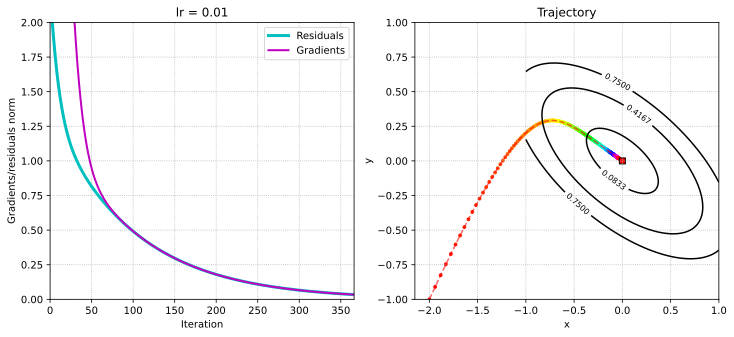

In [14]:
A = np.array([[2, 2], [2, 5]])
b = np.zeros(2)
q_oracle = QuadraticOracle(A, b)
test_2d("gd", q_oracle, np.array([-2.0, -1.0]), lr=0.01)

If you did all correctly, gradient descent should converge here to optimal point. But this is not always the case:

* if $\eta$ is very small, convergence could be too slow
* if $\eta$ is very big, than gradient descent often diverges

### Task 6.8 (1 point)

Take previous quadratic oracle and try different learning rates and starting points. Find the smallest and the largest learning rates for which gradient descent is still convergent. Provide some characteristic plots. Also, plot a graph of required iterations versus $\eta$.

### GD for linear regression

Let's try it for simple linear regression. Here is a toy example:

success 282 iterations


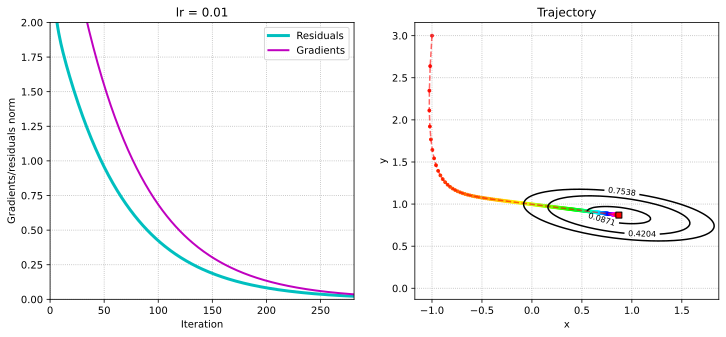

In [64]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8]])
b = np.array([-1, 2, 5])
oracle = LinRegOracle(A, b)
test_2d("gd", oracle, np.array([-1, 3.0]), lr=0.01, tol=1e-6)

### Task 6.9 (0.5 points)

Apply gradient descent algorithm to simple linear regression trained on `boston` dataset. Take `lstat` as feature, `medv` as target. Provide some visualizations.

success 5310 iterations


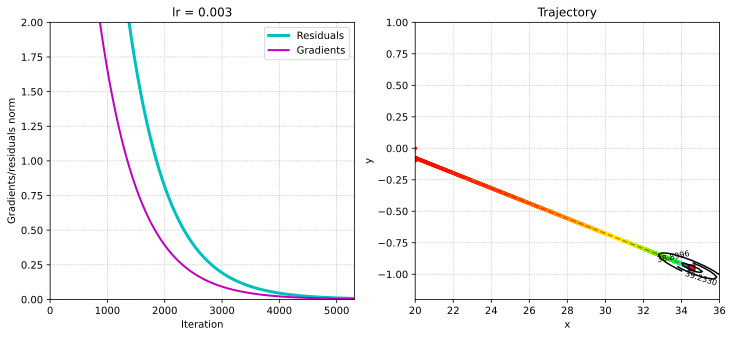

In [71]:
import pandas as pd
boston = pd.read_csv("../ISLP_datasets/Boston.csv").drop("Unnamed: 0", axis=1)
X = np.vstack((np.ones(boston.shape[0]), boston['lstat'])).T
y = boston['medv']

oracle = LinRegOracle(X, y)
test_2d("gd", oracle, np.array([20., 0.]), lr=0.003, tol=1e-8, xlims=[20, 36], ylims=[-1.2, 1])

### GD for logistic regression

The targets must be from $\{-1, 1\}$. One more toy example:

success 525 iterations


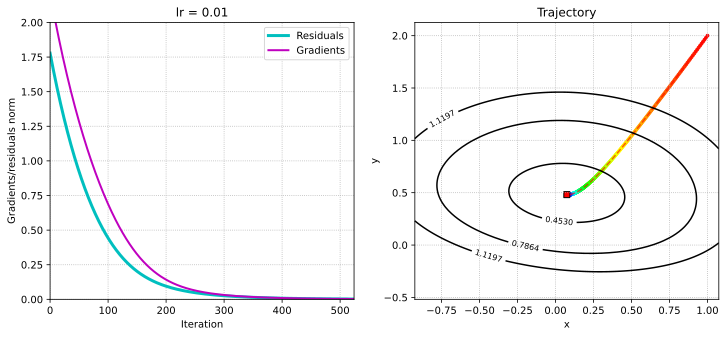

In [66]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8], [1, 3.4]])
b = np.array([-1, 1, 1, 1])
oracle = LogRegOracle(A, b)
test_2d("gd", oracle, np.array([1., 2.0]), lr=0.01, tol=1e-6)

### Task 6.10 (0.5 points)

Train simple logistic regression model on `breast_cancer` dataset using your gradient descent method. Take any feature from the dataset. Visualize the results.

success 177 iterations


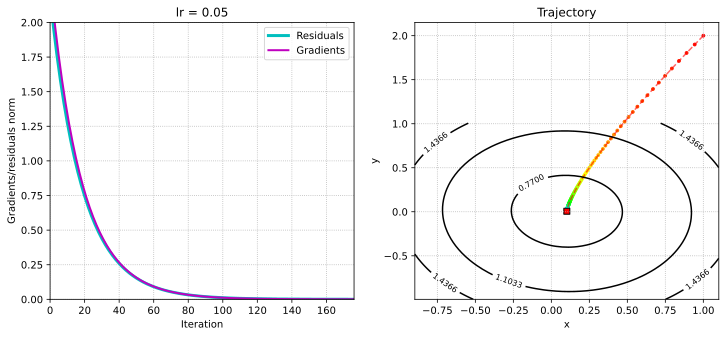

In [145]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
y = breast['target']
y[y == 0] = -1
X = np.hstack((np.ones(breast['data'].shape[0])[:, None], breast['data'][:, -1][:, None]))

oracle = LogRegOracle(X, y)
test_2d("gd", oracle, np.array([1., 2.]), lr=0.05, tol=1e-8)

## Newton's method

Given a starting point $\boldsymbol x_0 \in\mathbb R^n$ and learning rate $\eta > 0$, iteratively calculate

$$
    \boldsymbol x_{k+1} = \boldsymbol x_k - \eta \big(\nabla^2 f(\boldsymbol x_k)\big)^{-1} \nabla f(\boldsymbol x_k), \quad k = 0, 1,\ldots
$$

The process should stop when either $k = \mathrm{max\_iter}$ or 

$$
\Vert \nabla f(\boldsymbol x_k)\Vert_2^2 \leqslant \varepsilon \Vert \nabla f(\boldsymbol x_0)\Vert_2^2
$$

where $\varepsilon > 0$ is tolerance.

### Task 6.11 (1 point)

Implement Newton's method.

In [162]:
import scipy

def newton(oracle, x_0, learning_rate, tolerance=1e-5, max_iter=100, trace=False, display=False):
    """
    Newton's optimization method.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func(), .grad() and .hess() methods implemented for computing
        function value, its gradient and Hessian respectively. If the Hessian
        returned by the oracle is not positive-definite method stops with message="newton_direction_error"
    x_0 : np.array
        Starting point for optimization algorithm
    learning_rate : float
        Learning rate.
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    trace : bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.
    display : bool
        If True, debug information is displayed during optimization.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        'success' or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
                the stopping criterion.
            - 'newton_direction_error': in case of failure of solving linear system with Hessian matrix (e.g. non-invertible matrix).
            - 'computational_error': in case of getting Infinity or None value during the computations.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['time'] : list of floats, containing time passed from the start of the method
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2

    Example:
    --------
    >> oracle = QuadraticOracle(np.eye(5), np.arange(5))
    >> x_opt, message, history = newton(oracle, np.zeros(5), line_search_options={'method': 'Constant', 'c': 1.0})
    >> print('Found optimal point: {}'.format(x_opt))
       Found optimal point: [ 0.  1.  2.  3.  4.]
    """
    history = defaultdict(list) if trace else None
    x_k = np.copy(x_0)
    grad_at_x_0 = oracle.grad(x_0)

    INF = 1e100
    start_time = datetime.now()

    for i in range(max_iter + 1): 
        grad_at_x_k = oracle.grad(x_k)
        hess_at_x_k = oracle.hess(x_k)  

        if np.any(np.abs(x_k) > INF) or np.any(np.abs(grad_at_x_k) > INF):
            return x_k, 'computational_error', history

        if trace:
            history['time'].append((datetime.now() - start_time).seconds)
            history['func'].append(oracle.func(x_k))
            history['grad_norm'].append(np.linalg.norm(grad_at_x_k))
            if x_k.shape[0] <= 2:
                history['x'].append(np.array(x_k))

        if display:
            print("iteration {}: |x_k-x_0| = {}, f(x_k) = {}, |grad(f(x_k))| = {}".format(
                i, np.linalg.norm(x_k - x_0), oracle.func(x_k), np.linalg.norm(grad_at_x_k))
            )

        if np.linalg.norm(grad_at_x_k) <= np.sqrt(tolerance) * np.linalg.norm(grad_at_x_0):
            return x_k, 'success', history

        if i == max_iter:
            return x_k, 'iterations_exceeded', history

        try:
            d_k = scipy.linalg.cho_solve(scipy.linalg.cho_factor(hess_at_x_k, lower=True), grad_at_x_k)
        except np.linalg.LinAlgError as e:
            if display:
                print(e)
            return x_k, 'newton_direction_error', history  

        x_k -= learning_rate * d_k

### Task 6.12 (1 point)

Apply Newton's methods to the previous tasks:

* quadratic function
* simple linear regression trained on `boston` dataset
* simple logistic regression trained on `breast_cancer` dataset

Compare the number of iterations and time execution of GD and Newton methods in this examples. Visualize your results.

## Some plots

success 27 iterations


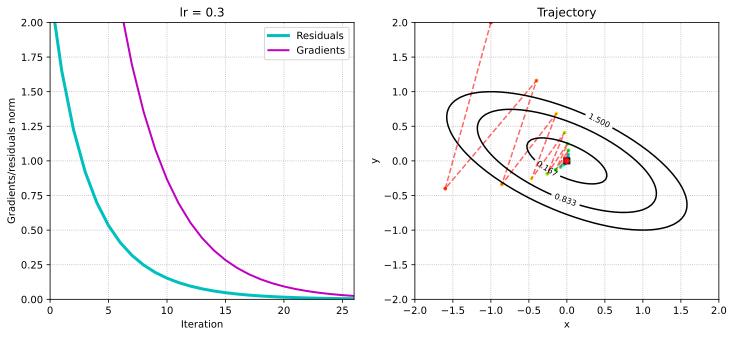

In [18]:
test_2d("gd", q_oracle, np.array([-1.0, 2.0]), lr=0.3, scale=2.0)

success 8 iterations


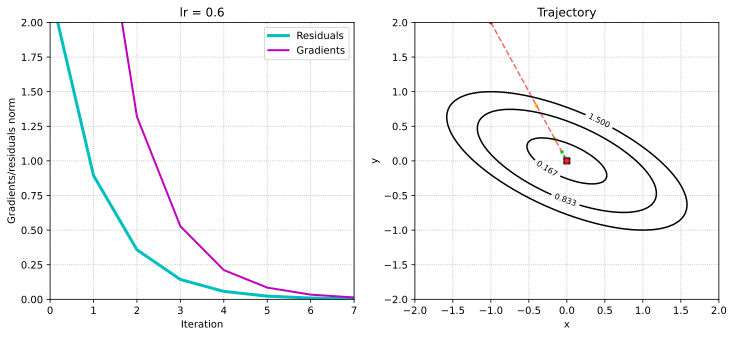

In [19]:
test_2d("newton", q_oracle, np.array([-1.0, 2.0]), lr=0.6, scale=2.0)

iterations_exceeded 10001 iterations


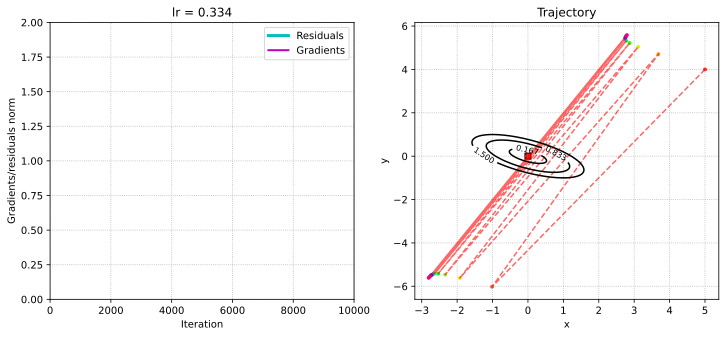

In [22]:
test_2d("gd", q_oracle, np.array([5, 4.0]), lr=0.334, scale=2.0, bound=20)

success 282 iterations


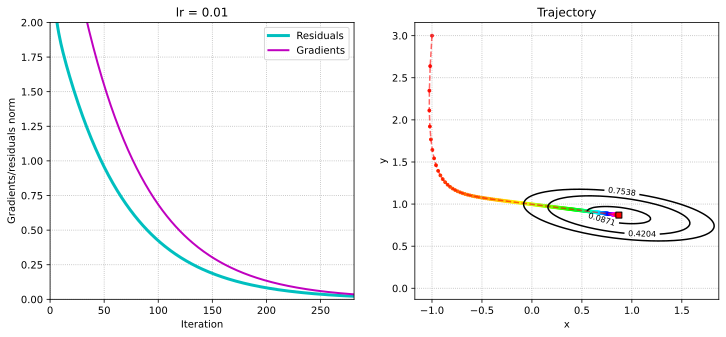

success 67 iterations


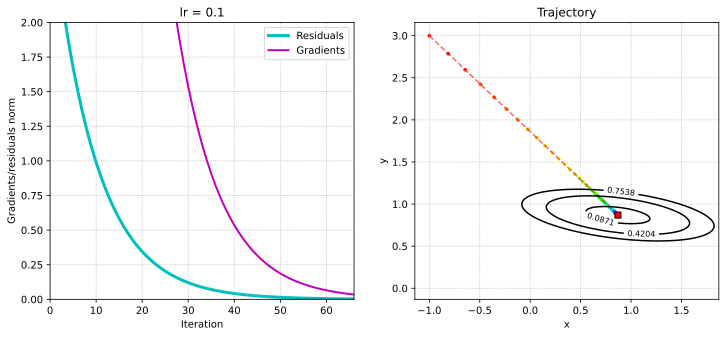

In [25]:
test_2d("newton", oracle, np.array([-1, 3.0]), lr=0.1, tol=1e-6)

success 89 iterations


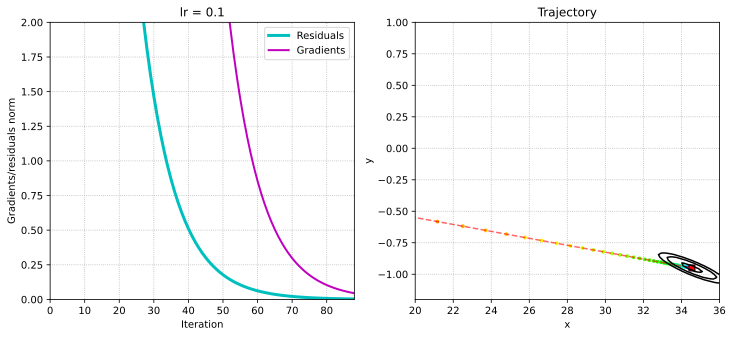

In [30]:
test_2d("newton", oracle, np.zeros(2), lr=0.1, tol=1e-8, xlims=[20, 36], ylims=[-1.2, 1])

success 56 iterations


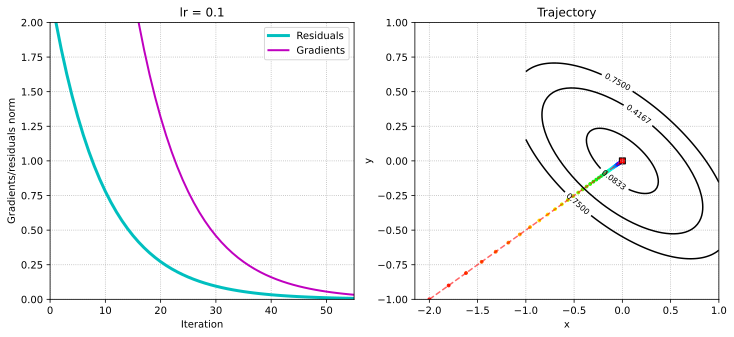

In [17]:
test_2d("newton", q_oracle, np.array([-2.0, -1.0]), lr=0.1)

success 525 iterations


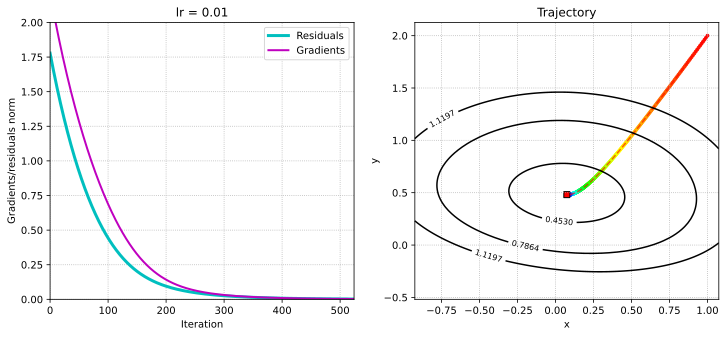

In [60]:
A = np.array([[1, -2.1], [1, 1.2], [1, 4.8], [1, 3.4]])
b = np.array([-1, 1, 1, 1])
oracle = LogRegOracle(A, b)
test_2d("gd", oracle, np.array([1., 2.0]), lr=0.01, tol=1e-6)
# x_star, msg, history = gradient_descent(oracle, np.array([1., 2.0]), 0.01, trace=True, display=True)

success 32 iterations


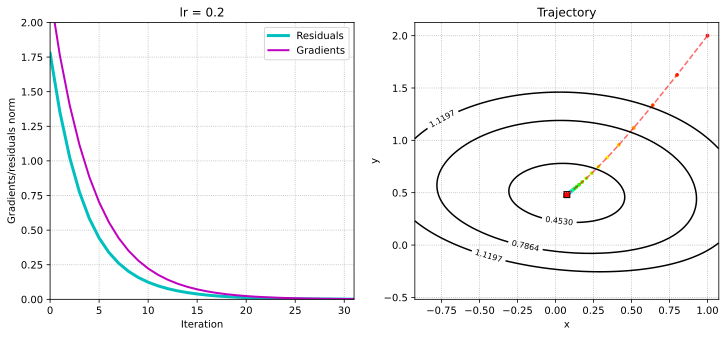

In [63]:
test_2d("newton", oracle, np.array([1., 2.0]), lr=0.2, tol=1e-6)

## GD vs Newton

### Task 6.13 (1 point)

Run both gradient descent and Newton's methods on full `boston` and `breast_cancer` datasets. Do they converge? How many iterations are required for convergence? 

GD vs Newton on the whole `boston` dataset:

In [165]:
X = np.hstack((np.ones(boston.shape[0])[:, None], boston.drop(["medv"], axis=1)))
y = boston['medv']
oracle = LinRegOracle(X, y)
x_star, msg, history = gradient_descent(
    oracle, np.zeros(X.shape[1]), 1e-6, tolerance=1e-8, max_iter=2*10**4, display=True, trace=True
)

iteration 0: |x_k-x_0| = 0.0, f(x_k) = 592.1469169960475, |grad(f(x_k))| = 17245.33595186298
iteration 1: |x_k-x_0| = 0.01724533595186298, f(x_k) = 354.37307656958393, |grad(f(x_k))| = 10331.98479471063
iteration 2: |x_k-x_0| = 0.027576142939348274, f(x_k) = 268.99498940129456, |grad(f(x_k))| = 6198.091693120722
iteration 3: |x_k-x_0| = 0.033769399590766455, f(x_k) = 238.2388054267043, |grad(f(x_k))| = 3731.4791810015
iteration 4: |x_k-x_0| = 0.037487778682850234, f(x_k) = 227.0605009815383, |grad(f(x_k))| = 2268.269897962366
iteration 5: |x_k-x_0| = 0.03972677374999621, f(x_k) = 222.8996251591939, |grad(f(x_k))| = 1413.5719841934804
iteration 6: |x_k-x_0| = 0.04108239907835986, f(x_k) = 221.25427070018392, |grad(f(x_k))| = 932.7111417625913
iteration 7: |x_k-x_0| = 0.0419114734054253, f(x_k) = 220.51086692917235, |grad(f(x_k))| = 682.0775342705618
iteration 8: |x_k-x_0| = 0.04242759376879699, f(x_k) = 220.0910783941992, |grad(f(x_k))| = 565.5369234933435
iteration 9: |x_k-x_0| = 0.042

iteration 216: |x_k-x_0| = 0.1041465327034196, f(x_k) = 180.06618946089986, |grad(f(x_k))| = 389.4614439211544
iteration 217: |x_k-x_0| = 0.10450130991271508, f(x_k) = 179.91459102392957, |grad(f(x_k))| = 389.04149664003376
iteration 218: |x_k-x_0| = 0.10485594770294274, f(x_k) = 179.76331933013003, |grad(f(x_k))| = 388.62205749824443
iteration 219: |x_k-x_0| = 0.10521044326727245, f(x_k) = 179.6123736322718, |grad(f(x_k))| = 388.2031259283125
iteration 220: |x_k-x_0| = 0.10556479384788457, f(x_k) = 179.46175318484413, |grad(f(x_k))| = 387.78470136342133
iteration 221: |x_k-x_0| = 0.10591899673508241, f(x_k) = 179.31145724405027, |grad(f(x_k))| = 387.3667832374119
iteration 222: |x_k-x_0| = 0.10627304926642323, f(x_k) = 179.16148506780408, |grad(f(x_k))| = 386.9493709847806
iteration 223: |x_k-x_0| = 0.10662694882586642, f(x_k) = 179.01183591572635, |grad(f(x_k))| = 386.5324640406794
iteration 224: |x_k-x_0| = 0.10698069284293951, f(x_k) = 178.86250904914007, |grad(f(x_k))| = 386.11606

iteration 419: |x_k-x_0| = 0.17138400957617, f(x_k) = 155.07243693361718, |grad(f(x_k))| = 313.89404489583774
iteration 420: |x_k-x_0| = 0.17168729103332223, f(x_k) = 154.9739588772729, |grad(f(x_k))| = 313.5664656717197
iteration 421: |x_k-x_0| = 0.1719902878821554, f(x_k) = 154.87568624674353, |grad(f(x_k))| = 313.2392918297681
iteration 422: |x_k-x_0| = 0.17229300020450675, f(x_k) = 154.7776185737191, |grad(f(x_k))| = 312.91252292069356
iteration 423: |x_k-x_0| = 0.17259542808455502, f(x_k) = 154.67975539096616, |grad(f(x_k))| = 312.5861584957191
iteration 424: |x_k-x_0| = 0.17289757160879013, f(x_k) = 154.58209623232472, |grad(f(x_k))| = 312.260198106577
iteration 425: |x_k-x_0| = 0.17319943086598324, f(x_k) = 154.48464063270643, |grad(f(x_k))| = 311.9346413055098
iteration 426: |x_k-x_0| = 0.1735010059471573, f(x_k) = 154.38738812809197, |grad(f(x_k))| = 311.6094876452693
iteration 427: |x_k-x_0| = 0.1738022969455579, f(x_k) = 154.29033825552818, |grad(f(x_k))| = 311.2847366791152

iteration 673: |x_k-x_0| = 0.23972544827816705, f(x_k) = 135.5587443724948, |grad(f(x_k))| = 242.58286733949961
iteration 674: |x_k-x_0| = 0.23996233707151776, f(x_k) = 135.49992676715928, |grad(f(x_k))| = 242.34509310305904
iteration 675: |x_k-x_0| = 0.2401989937686285, f(x_k) = 135.4412243998479, |grad(f(x_k))| = 242.10762489233485
iteration 676: |x_k-x_0| = 0.24043541861317552, f(x_k) = 135.3826370094553, |grad(f(x_k))| = 241.87046236851117
iteration 677: |x_k-x_0| = 0.24067161184878644, f(x_k) = 135.3241643354757, |grad(f(x_k))| = 241.6336051931365
iteration 678: |x_k-x_0| = 0.24090757371903837, f(x_k) = 135.26580611800176, |grad(f(x_k))| = 241.39705302812382
iteration 679: |x_k-x_0| = 0.24114330446745644, f(x_k) = 135.20756209772242, |grad(f(x_k))| = 241.16080553574878
iteration 680: |x_k-x_0| = 0.24137880433751202, f(x_k) = 135.14943201592268, |grad(f(x_k))| = 240.92486237865015
iteration 681: |x_k-x_0| = 0.24161407357262096, f(x_k) = 135.0914156144813, |grad(f(x_k))| = 240.68922

iteration 755: |x_k-x_0| = 0.2584009912852043, f(x_k) = 131.0962948821229, |grad(f(x_k))| = 224.0723095336399
iteration 756: |x_k-x_0| = 0.2586196505482445, f(x_k) = 131.04611043474702, |grad(f(x_k))| = 223.85853559747378
iteration 757: |x_k-x_0| = 0.25883809740939573, f(x_k) = 130.99602168918636, |grad(f(x_k))| = 223.64504107032835
iteration 758: |x_k-x_0| = 0.2590563321039361, f(x_k) = 130.94602842918934, |grad(f(x_k))| = 223.4318256416319
iteration 759: |x_k-x_0| = 0.259274354867, f(x_k) = 130.89613043900147, |grad(f(x_k))| = 223.21888900113774
iteration 760: |x_k-x_0| = 0.2594921659335773, f(x_k) = 130.84632750336317, |grad(f(x_k))| = 223.00623083892333
iteration 761: |x_k-x_0| = 0.2597097655385123, f(x_k) = 130.7966194075091, |grad(f(x_k))| = 222.79385084538978
iteration 762: |x_k-x_0| = 0.25992715391650345, f(x_k) = 130.74700593716693, |grad(f(x_k))| = 222.58174871126107
iteration 763: |x_k-x_0| = 0.2601443313021024, f(x_k) = 130.69748687855633, |grad(f(x_k))| = 222.3699241275844

iteration 974: |x_k-x_0| = 0.3016079240606804, f(x_k) = 122.0590636027063, |grad(f(x_k))| = 183.4178247098135
iteration 975: |x_k-x_0| = 0.3017853911745918, f(x_k) = 122.02543613162115, |grad(f(x_k))| = 183.258347217292
iteration 976: |x_k-x_0| = 0.3019626932455458, f(x_k) = 121.99186710440323, |grad(f(x_k))| = 183.0990881191543
iteration 977: |x_k-x_0| = 0.3021398304688885, f(x_k) = 121.95835639028593, |grad(f(x_k))| = 182.94004716581924
iteration 978: |x_k-x_0| = 0.302316803039771, f(x_k) = 121.92490385880238, |grad(f(x_k))| = 182.78122410794185
iteration 979: |x_k-x_0| = 0.30249361115314966, f(x_k) = 121.89150937978485, |grad(f(x_k))| = 182.62261869641353
iteration 980: |x_k-x_0| = 0.30267025500378614, f(x_k) = 121.85817282336411, |grad(f(x_k))| = 182.46423068236146
iteration 981: |x_k-x_0| = 0.3028467347862472, f(x_k) = 121.82489405996876, |grad(f(x_k))| = 182.3060598171486
iteration 982: |x_k-x_0| = 0.3030230506949049, f(x_k) = 121.79167296032432, |grad(f(x_k))| = 182.148105852372

iteration 1308: |x_k-x_0| = 0.3528093142902898, f(x_k) = 113.40499437825456, |grad(f(x_k))| = 140.8717057262617
iteration 1309: |x_k-x_0| = 0.35294136371430634, f(x_k) = 113.38515652295305, |grad(f(x_k))| = 140.7725968052154
iteration 1310: |x_k-x_0| = 0.35307330306784057, f(x_k) = 113.36534656589544, |grad(f(x_k))| = 140.6736343086902
iteration 1311: |x_k-x_0| = 0.3532051324868688, f(x_k) = 113.34556444627522, |grad(f(x_k))| = 140.57481805116024
iteration 1312: |x_k-x_0| = 0.3533368521072123, f(x_k) = 113.32581010342503, |grad(f(x_k))| = 140.47614784725744
iteration 1313: |x_k-x_0| = 0.35346846206453747, f(x_k) = 113.30608347681606, |grad(f(x_k))| = 140.37762351177238
iteration 1314: |x_k-x_0| = 0.3535999624943562, f(x_k) = 113.28638450605794, |grad(f(x_k))| = 140.27924485965403
iteration 1315: |x_k-x_0| = 0.3537313535320257, f(x_k) = 113.26671313089842, |grad(f(x_k))| = 140.1810117060095
iteration 1316: |x_k-x_0| = 0.3538626353127489, f(x_k) = 113.24706929122291, |grad(f(x_k))| = 140

iteration 1653: |x_k-x_0| = 0.39267313501381607, f(x_k) = 107.87335888768042, |grad(f(x_k))| = 114.1971818719324
iteration 1654: |x_k-x_0| = 0.3927743108087863, f(x_k) = 107.86032123716889, |grad(f(x_k))| = 114.13859965173037
iteration 1655: |x_k-x_0| = 0.3928754152141287, f(x_k) = 107.84729695615158, |grad(f(x_k))| = 114.08010864685409
iteration 1656: |x_k-x_0| = 0.39297644832065715, f(x_k) = 107.83428601696879, |grad(f(x_k))| = 114.02170872176568
iteration 1657: |x_k-x_0| = 0.3930774102190766, f(x_k) = 107.82128839202366, |grad(f(x_k))| = 113.96339974106472
iteration 1658: |x_k-x_0| = 0.3931783009999843, f(x_k) = 107.80830405378214, |grad(f(x_k))| = 113.90518156948812
iteration 1659: |x_k-x_0| = 0.3932791207538687, f(x_k) = 107.79533297477275, |grad(f(x_k))| = 113.84705407191018
iteration 1660: |x_k-x_0| = 0.39337986957111065, f(x_k) = 107.78237512758639, |grad(f(x_k))| = 113.78901711334254
iteration 1661: |x_k-x_0| = 0.3934805475419826, f(x_k) = 107.7694304848764, |grad(f(x_k))| = 1

iteration 2038: |x_k-x_0| = 0.42711564124023876, f(x_k) = 103.6291488055655, |grad(f(x_k))| = 97.22858530491354
iteration 2039: |x_k-x_0| = 0.42719512093494855, f(x_k) = 103.61969697417929, |grad(f(x_k))| = 97.19637360398632
iteration 2040: |x_k-x_0| = 0.427274557209057, f(x_k) = 103.61025140265531, |grad(f(x_k))| = 97.16421080920747
iteration 2041: |x_k-x_0| = 0.427353950119394, f(x_k) = 103.60081207942102, |grad(f(x_k))| = 97.13209683539753
iteration 2042: |x_k-x_0| = 0.4274332997227187, f(x_k) = 103.59137899292985, |grad(f(x_k))| = 97.10003159749729
iteration 2043: |x_k-x_0| = 0.4275126060757203, f(x_k) = 103.58195213166117, |grad(f(x_k))| = 97.06801501056775
iteration 2044: |x_k-x_0| = 0.42759186923501735, f(x_k) = 103.57253148412012, |grad(f(x_k))| = 97.03604698979018
iteration 2045: |x_k-x_0| = 0.4276710892571588, f(x_k) = 103.56311703883783, |grad(f(x_k))| = 97.00412745046583
iteration 2046: |x_k-x_0| = 0.427750266198623, f(x_k) = 103.55370878437081, |grad(f(x_k))| = 96.97225630

iteration 2461: |x_k-x_0| = 0.45748761250336617, f(x_k) = 100.07330299791711, |grad(f(x_k))| = 87.04954173682097
iteration 2462: |x_k-x_0| = 0.4575530129587062, f(x_k) = 100.06572614753176, |grad(f(x_k))| = 87.0318018104024
iteration 2463: |x_k-x_0| = 0.4576183886553892, f(x_k) = 100.05815238420237, |grad(f(x_k))| = 87.01408432514357
iteration 2464: |x_k-x_0| = 0.4576837396266969, f(x_k) = 100.05058170339656, |grad(f(x_k))| = 86.99638923810014
iteration 2465: |x_k-x_0| = 0.45774906590586817, f(x_k) = 100.0430141005918, |grad(f(x_k))| = 86.97871650640494
iteration 2466: |x_k-x_0| = 0.4578143675260988, f(x_k) = 100.03544957127549, |grad(f(x_k))| = 86.96106608726782
iteration 2467: |x_k-x_0| = 0.4578796445205417, f(x_k) = 100.02788811094476, |grad(f(x_k))| = 86.94343793797562
iteration 2468: |x_k-x_0| = 0.4579448969223072, f(x_k) = 100.0203297151066, |grad(f(x_k))| = 86.92583201589201
iteration 2469: |x_k-x_0| = 0.4580101247644626, f(x_k) = 100.01277437927754, |grad(f(x_k))| = 86.90824827

iteration 2847: |x_k-x_0| = 0.48117324056906724, f(x_k) = 97.34252421163747, |grad(f(x_k))| = 81.52396475572338
iteration 2848: |x_k-x_0| = 0.4812311914714309, f(x_k) = 97.33587852892582, |grad(f(x_k))| = 81.51233562654221
iteration 2849: |x_k-x_0| = 0.4812891277082518, f(x_k) = 97.32923474168344, |grad(f(x_k))| = 81.50071712428324
iteration 2850: |x_k-x_0| = 0.48134704929953703, f(x_k) = 97.3225928479087, |grad(f(x_k))| = 81.48910922840128
iteration 2851: |x_k-x_0| = 0.48140495626526714, f(x_k) = 97.31595284560403, |grad(f(x_k))| = 81.47751191839221
iteration 2852: |x_k-x_0| = 0.4814628486253953, f(x_k) = 97.3093147327758, |grad(f(x_k))| = 81.46592517379284
iteration 2853: |x_k-x_0| = 0.4815207263998483, f(x_k) = 97.30267850743483, |grad(f(x_k))| = 81.45434897418089
iteration 2854: |x_k-x_0| = 0.48157858960852573, f(x_k) = 97.29604416759562, |grad(f(x_k))| = 81.44278329917496
iteration 2855: |x_k-x_0| = 0.48163643827130037, f(x_k) = 97.28941171127687, |grad(f(x_k))| = 81.4312281284342

iteration 3261: |x_k-x_0| = 0.5041165692868541, f(x_k) = 94.73389597324375, |grad(f(x_k))| = 77.41961546826222
iteration 3262: |x_k-x_0| = 0.5041698791520268, f(x_k) = 94.7279025087123, |grad(f(x_k))| = 77.41103134445028
iteration 3263: |x_k-x_0| = 0.5042231806774452, f(x_k) = 94.72191037304066, |grad(f(x_k))| = 77.40245209564156
iteration 3264: |x_k-x_0| = 0.5042764738743887, f(x_k) = 94.71591956532721, |grad(f(x_k))| = 77.39387771306312
iteration 3265: |x_k-x_0| = 0.5043297587541207, f(x_k) = 94.70993008467188, |grad(f(x_k))| = 77.38530818796055
iteration 3266: |x_k-x_0| = 0.5043830353278885, f(x_k) = 94.7039419301763, |grad(f(x_k))| = 77.37674351159755
iteration 3267: |x_k-x_0| = 0.5044363036069239, f(x_k) = 94.6979551009436, |grad(f(x_k))| = 77.36818367525628
iteration 3268: |x_k-x_0| = 0.5044895636024418, f(x_k) = 94.69196959607852, |grad(f(x_k))| = 77.35962867023707
iteration 3269: |x_k-x_0| = 0.5045428153256415, f(x_k) = 94.68598541468744, |grad(f(x_k))| = 77.35107848785846
iter

iteration 3727: |x_k-x_0| = 0.5282166037547013, f(x_k) = 92.07238228374452, |grad(f(x_k))| = 73.83036615653003
iteration 3728: |x_k-x_0| = 0.5282670158264224, f(x_k) = 92.06693161981133, |grad(f(x_k))| = 73.82334956333551
iteration 3729: |x_k-x_0| = 0.5283174233741222, f(x_k) = 92.06148199179586, |grad(f(x_k))| = 73.81633523739168
iteration 3730: |x_k-x_0| = 0.5283678264034507, f(x_k) = 92.05603339926503, |grad(f(x_k))| = 73.80932317541216
iteration 3731: |x_k-x_0| = 0.5284182249200482, f(x_k) = 92.05058584178647, |grad(f(x_k))| = 73.80231337411732
iteration 3732: |x_k-x_0| = 0.528468618929547, f(x_k) = 92.04513931892824, |grad(f(x_k))| = 73.79530583023454
iteration 3733: |x_k-x_0| = 0.5285190084375707, f(x_k) = 92.0396938302591, |grad(f(x_k))| = 73.78830054049804
iteration 3734: |x_k-x_0| = 0.5285693934497336, f(x_k) = 92.03424937534821, |grad(f(x_k))| = 73.78129750164891
iteration 3735: |x_k-x_0| = 0.528619773971642, f(x_k) = 92.02880595376547, |grad(f(x_k))| = 73.77429671043507
iter

iteration 4069: |x_k-x_0| = 0.5452265730995088, f(x_k) = 90.2660824726734, |grad(f(x_k))| = 71.54454786547778
iteration 4070: |x_k-x_0| = 0.5452757155066451, f(x_k) = 90.26096407909438, |grad(f(x_k))| = 71.53815346438378
iteration 4071: |x_k-x_0| = 0.5453248548806251, f(x_k) = 90.25584660037069, |grad(f(x_k))| = 71.53176052694843
iteration 4072: |x_k-x_0| = 0.5453739912246958, f(x_k) = 90.25073003621132, |grad(f(x_k))| = 71.5253690515598
iteration 4073: |x_k-x_0| = 0.5454231245420985, f(x_k) = 90.2456143863254, |grad(f(x_k))| = 71.5189790366092
iteration 4074: |x_k-x_0| = 0.5454722548360692, f(x_k) = 90.2404996504224, |grad(f(x_k))| = 71.51259048049123
iteration 4075: |x_k-x_0| = 0.5455213821098384, f(x_k) = 90.23538582821207, |grad(f(x_k))| = 71.50620338160388
iteration 4076: |x_k-x_0| = 0.5455705063666306, f(x_k) = 90.23027291940451, |grad(f(x_k))| = 71.49981773834837
iteration 4077: |x_k-x_0| = 0.5456196276096658, f(x_k) = 90.22516092370994, |grad(f(x_k))| = 71.4934335491291
iterati

iteration 4495: |x_k-x_0| = 0.5659215494875459, f(x_k) = 88.16507163428938, |grad(f(x_k))| = 68.93616926078583
iteration 4496: |x_k-x_0| = 0.5659696325231472, f(x_k) = 88.16031964162644, |grad(f(x_k))| = 68.93028657033086
iteration 4497: |x_k-x_0| = 0.5660177134958729, f(x_k) = 88.1555684599373, |grad(f(x_k))| = 68.92440488194443
iteration 4498: |x_k-x_0| = 0.5660657924072047, f(x_k) = 88.15081808901473, |grad(f(x_k))| = 68.91852419493365
iteration 4499: |x_k-x_0| = 0.5661138692586213, f(x_k) = 88.14606852865143, |grad(f(x_k))| = 68.91264450860696
iteration 4500: |x_k-x_0| = 0.5661619440515985, f(x_k) = 88.14131977864048, |grad(f(x_k))| = 68.90676582227412
iteration 4501: |x_k-x_0| = 0.5662100167876088, f(x_k) = 88.13657183877491, |grad(f(x_k))| = 68.90088813524612
iteration 4502: |x_k-x_0| = 0.566258087468122, f(x_k) = 88.13182470884786, |grad(f(x_k))| = 68.89501144683533
iteration 4503: |x_k-x_0| = 0.5663061560946049, f(x_k) = 88.12707838865275, |grad(f(x_k))| = 68.88913575635537
ite

iteration 4900: |x_k-x_0| = 0.5852397453631925, f(x_k) = 86.30470965091904, |grad(f(x_k))| = 66.62927025140023
iteration 4901: |x_k-x_0| = 0.5852870855975267, f(x_k) = 86.300270375225, |grad(f(x_k))| = 66.6237484339414
iteration 4902: |x_k-x_0| = 0.5853344241664723, f(x_k) = 86.29583183528783, |grad(f(x_k))| = 66.61822741955511
iteration 4903: |x_k-x_0| = 0.5853817610706016, f(x_k) = 86.29139403093956, |grad(f(x_k))| = 66.6127072079014
iteration 4904: |x_k-x_0| = 0.5854290963104856, f(x_k) = 86.28695696201227, |grad(f(x_k))| = 66.60718779864085
iteration 4905: |x_k-x_0| = 0.5854764298866929, f(x_k) = 86.28252062833812, |grad(f(x_k))| = 66.6016691914346
iteration 4906: |x_k-x_0| = 0.5855237617997916, f(x_k) = 86.27808502974943, |grad(f(x_k))| = 66.59615138594428
iteration 4907: |x_k-x_0| = 0.5855710920503471, f(x_k) = 86.27365016607851, |grad(f(x_k))| = 66.59063438183216
iteration 4908: |x_k-x_0| = 0.5856184206389239, f(x_k) = 86.2692160371577, |grad(f(x_k))| = 66.5851181787609
iteratio

iteration 5096: |x_k-x_0| = 0.5944872225843564, f(x_k) = 85.44846845427921, |grad(f(x_k))| = 65.56195055712084
iteration 5097: |x_k-x_0| = 0.5945342454949502, f(x_k) = 85.44417026096465, |grad(f(x_k))| = 65.55658025307824
iteration 5098: |x_k-x_0| = 0.5945812668245358, f(x_k) = 85.43987277175765, |grad(f(x_k))| = 65.55121069456433
iteration 5099: |x_k-x_0| = 0.594628286573415, f(x_k) = 85.43557598650274, |grad(f(x_k))| = 65.54584188132631
iteration 5100: |x_k-x_0| = 0.5946753047418887, f(x_k) = 85.43127990504453, |grad(f(x_k))| = 65.5404738131116
iteration 5101: |x_k-x_0| = 0.5947223213302563, f(x_k) = 85.42698452722786, |grad(f(x_k))| = 65.5351064896681
iteration 5102: |x_k-x_0| = 0.594769336338816, f(x_k) = 85.42268985289742, |grad(f(x_k))| = 65.529739910744
iteration 5103: |x_k-x_0| = 0.5948163497678652, f(x_k) = 85.41839588189804, |grad(f(x_k))| = 65.52437407608785
iteration 5104: |x_k-x_0| = 0.5948633616176998, f(x_k) = 85.41410261407458, |grad(f(x_k))| = 65.51900898544856
iterati

iteration 5457: |x_k-x_0| = 0.6113613856607867, f(x_k) = 83.94140220937032, |grad(f(x_k))| = 63.669964237814376
iteration 5458: |x_k-x_0| = 0.6114078496237856, f(x_k) = 83.93734850787114, |grad(f(x_k))| = 63.66484896018506
iteration 5459: |x_k-x_0| = 0.6114543120526073, f(x_k) = 83.9332954576904, |grad(f(x_k))| = 63.65973435509917
iteration 5460: |x_k-x_0| = 0.611500772947242, f(x_k) = 83.92924305869008, |grad(f(x_k))| = 63.65462042239423
iteration 5461: |x_k-x_0| = 0.6115472323076796, f(x_k) = 83.92519131073239, |grad(f(x_k))| = 63.64950716190781
iteration 5462: |x_k-x_0| = 0.6115936901339094, f(x_k) = 83.92114021367938, |grad(f(x_k))| = 63.64439457347771
iteration 5463: |x_k-x_0| = 0.6116401464259199, f(x_k) = 83.91708976739326, |grad(f(x_k))| = 63.63928265694189
iteration 5464: |x_k-x_0| = 0.6116866011836991, f(x_k) = 83.9130399717362, |grad(f(x_k))| = 63.63417141213845
iteration 5465: |x_k-x_0| = 0.6117330544072342, f(x_k) = 83.90899082657052, |grad(f(x_k))| = 63.62906083890569
ite

iteration 5668: |x_k-x_0| = 0.6211312325668173, f(x_k) = 83.10029145304702, |grad(f(x_k))| = 62.60530234641331
iteration 5669: |x_k-x_0| = 0.6211773717623307, f(x_k) = 83.0963721849522, |grad(f(x_k))| = 62.60032560734985
iteration 5670: |x_k-x_0| = 0.6212235094099482, f(x_k) = 83.09245353994065, |grad(f(x_k))| = 62.59534950976647
iteration 5671: |x_k-x_0| = 0.6212696455095565, f(x_k) = 83.08853551788252, |grad(f(x_k))| = 62.59037405352933
iteration 5672: |x_k-x_0| = 0.6213157800610419, f(x_k) = 83.08461811864808, |grad(f(x_k))| = 62.5853992385048
iteration 5673: |x_k-x_0| = 0.6213619130642903, f(x_k) = 83.08070134210743, |grad(f(x_k))| = 62.580425064559265
iteration 5674: |x_k-x_0| = 0.6214080445191873, f(x_k) = 83.07678518813103, |grad(f(x_k))| = 62.57545153155926
iteration 5675: |x_k-x_0| = 0.621454174425618, f(x_k) = 83.07286965658908, |grad(f(x_k))| = 62.57047863937144
iteration 5676: |x_k-x_0| = 0.621500302783467, f(x_k) = 83.06895474735192, |grad(f(x_k))| = 62.565506387862584
ite

iteration 5814: |x_k-x_0| = 0.6278511064373221, f(x_k) = 82.53460832282929, |grad(f(x_k))| = 61.885422412239706
iteration 5815: |x_k-x_0| = 0.6278970182583997, f(x_k) = 82.53077866846203, |grad(f(x_k))| = 61.880537964928365
iteration 5816: |x_k-x_0| = 0.6279429285113463, f(x_k) = 82.52694961859186, |grad(f(x_k))| = 61.87565414061893
iteration 5817: |x_k-x_0| = 0.6279888371960007, f(x_k) = 82.52312117309398, |grad(f(x_k))| = 61.8707709391915
iteration 5818: |x_k-x_0| = 0.6280347443122012, f(x_k) = 82.51929333184371, |grad(f(x_k))| = 61.86588836052631
iteration 5819: |x_k-x_0| = 0.6280806498597858, f(x_k) = 82.51546609471617, |grad(f(x_k))| = 61.86100640450363
iteration 5820: |x_k-x_0| = 0.6281265538385924, f(x_k) = 82.51163946158674, |grad(f(x_k))| = 61.85612507100375
iteration 5821: |x_k-x_0| = 0.6281724562484583, f(x_k) = 82.50781343233069, |grad(f(x_k))| = 61.85124435990715
iteration 5822: |x_k-x_0| = 0.6282183570892209, f(x_k) = 82.50398800682343, |grad(f(x_k))| = 61.84636427109435


iteration 5893: |x_k-x_0| = 0.631473295732051, f(x_k) = 82.23391826330669, |grad(f(x_k))| = 61.50146118259827
iteration 5894: |x_k-x_0| = 0.6315190831528988, f(x_k) = 82.2301359822789, |grad(f(x_k))| = 61.49662558932197
iteration 5895: |x_k-x_0| = 0.6315648689920759, f(x_k) = 82.22635429598931, |grad(f(x_k))| = 61.4917906098175
iteration 5896: |x_k-x_0| = 0.631610653249401, f(x_k) = 82.2225732043156, |grad(f(x_k))| = 61.4869562439711
iteration 5897: |x_k-x_0| = 0.6316564359246932, f(x_k) = 82.21879270713562, |grad(f(x_k))| = 61.48212249166889
iteration 5898: |x_k-x_0| = 0.6317022170177711, f(x_k) = 82.21501280432717, |grad(f(x_k))| = 61.47728935279721
iteration 5899: |x_k-x_0| = 0.6317479965284529, f(x_k) = 82.21123349576804, |grad(f(x_k))| = 61.472456827242404
iteration 5900: |x_k-x_0| = 0.631793774456557, f(x_k) = 82.20745478133624, |grad(f(x_k))| = 61.46762491489091
iteration 5901: |x_k-x_0| = 0.6318395508019014, f(x_k) = 82.2036766609096, |grad(f(x_k))| = 61.46279361562926
iteratio

iteration 6047: |x_k-x_0| = 0.6385058122910904, f(x_k) = 81.65838133516698, |grad(f(x_k))| = 60.763944219224165
iteration 6048: |x_k-x_0| = 0.6385513538842256, f(x_k) = 81.65468922233428, |grad(f(x_k))| = 60.759201845067444
iteration 6049: |x_k-x_0| = 0.638596893865568, f(x_k) = 81.65099768578045, |grad(f(x_k))| = 60.7544600679121
iteration 6050: |x_k-x_0| = 0.6386424322349089, f(x_k) = 81.64730672538798, |grad(f(x_k))| = 60.74971888765383
iteration 6051: |x_k-x_0| = 0.6386879689920403, f(x_k) = 81.64361634103933, |grad(f(x_k))| = 60.74497830418836
iteration 6052: |x_k-x_0| = 0.6387335041367534, f(x_k) = 81.63992653261705, |grad(f(x_k))| = 60.74023831741148
iteration 6053: |x_k-x_0| = 0.6387790376688397, f(x_k) = 81.63623730000378, |grad(f(x_k))| = 60.735498927218984
iteration 6054: |x_k-x_0| = 0.6388245695880904, f(x_k) = 81.63254864308203, |grad(f(x_k))| = 60.730760133506834
iteration 6055: |x_k-x_0| = 0.6388700998942966, f(x_k) = 81.62886056173457, |grad(f(x_k))| = 60.72602193617091

iteration 6224: |x_k-x_0| = 0.6465413750288, f(x_k) = 81.01374786555638, |grad(f(x_k))| = 59.93375009329807
iteration 6225: |x_k-x_0| = 0.6465866279854207, f(x_k) = 81.01015595015268, |grad(f(x_k))| = 59.929111808643185
iteration 6226: |x_k-x_0| = 0.646631879291681, f(x_k) = 81.00656459067892, |grad(f(x_k))| = 59.92447410328092
iteration 6227: |x_k-x_0| = 0.6466771289473556, f(x_k) = 81.0029737870227, |grad(f(x_k))| = 59.919836977115104
iteration 6228: |x_k-x_0| = 0.6467223769522192, f(x_k) = 80.99938353907156, |grad(f(x_k))| = 59.91520043004965
iteration 6229: |x_k-x_0| = 0.6467676233060461, f(x_k) = 80.99579384671316, |grad(f(x_k))| = 59.910564461988514
iteration 6230: |x_k-x_0| = 0.6468128680086107, f(x_k) = 80.99220470983502, |grad(f(x_k))| = 59.905929072835654
iteration 6231: |x_k-x_0| = 0.6468581110596875, f(x_k) = 80.9886161283249, |grad(f(x_k))| = 59.901294262495114
iteration 6232: |x_k-x_0| = 0.6469033524590505, f(x_k) = 80.98502810207044, |grad(f(x_k))| = 59.89666003087096
it

iteration 6507: |x_k-x_0| = 0.6592812538583749, f(x_k) = 80.0190058821418, |grad(f(x_k))| = 58.64388130054315
iteration 6508: |x_k-x_0| = 0.6593260306269361, f(x_k) = 80.01556690863434, |grad(f(x_k))| = 58.63940325343484
iteration 6509: |x_k-x_0| = 0.6593708056801219, f(x_k) = 80.01212846030077, |grad(f(x_k))| = 58.634925759793525
iteration 6510: |x_k-x_0| = 0.659415579017702, f(x_k) = 80.00869053703597, |grad(f(x_k))| = 58.63044881953217
iteration 6511: |x_k-x_0| = 0.6594603506394461, f(x_k) = 80.00525313873504, |grad(f(x_k))| = 58.62597243256385
iteration 6512: |x_k-x_0| = 0.6595051205451242, f(x_k) = 80.00181626529296, |grad(f(x_k))| = 58.62149659880162
iteration 6513: |x_k-x_0| = 0.6595498887345062, f(x_k) = 79.99837991660486, |grad(f(x_k))| = 58.617021318158585
iteration 6514: |x_k-x_0| = 0.6595946552073616, f(x_k) = 79.99494409256582, |grad(f(x_k))| = 58.61254659054784
iteration 6515: |x_k-x_0| = 0.6596394199634608, f(x_k) = 79.99150879307092, |grad(f(x_k))| = 58.60807241588255
i

iteration 6733: |x_k-x_0| = 0.6693567562414976, f(x_k) = 79.25495368948378, |grad(f(x_k))| = 57.645752041725125
iteration 6734: |x_k-x_0| = 0.6694011395426959, f(x_k) = 79.25163078228412, |grad(f(x_k))| = 57.64139691294925
iteration 6735: |x_k-x_0| = 0.6694455210773941, f(x_k) = 79.24830837715, |grad(f(x_k))| = 57.63704231858909
iteration 6736: |x_k-x_0| = 0.6694899008453716, f(x_k) = 79.24498647398178, |grad(f(x_k))| = 57.63268825856286
iteration 6737: |x_k-x_0| = 0.6695342788464079, f(x_k) = 79.24166507268006, |grad(f(x_k))| = 57.62833473278873
iteration 6738: |x_k-x_0| = 0.6695786550802824, f(x_k) = 79.23834417314528, |grad(f(x_k))| = 57.62398174118493
iteration 6739: |x_k-x_0| = 0.6696230295467746, f(x_k) = 79.23502377527801, |grad(f(x_k))| = 57.619629283669646
iteration 6740: |x_k-x_0| = 0.6696674022456641, f(x_k) = 79.23170387897885, |grad(f(x_k))| = 57.615277360161194
iteration 6741: |x_k-x_0| = 0.6697117731767306, f(x_k) = 79.22838448414826, |grad(f(x_k))| = 57.61092597057784
i

iteration 7028: |x_k-x_0| = 0.6823723126116821, f(x_k) = 78.29605369570825, |grad(f(x_k))| = 56.38382326463865
iteration 7029: |x_k-x_0| = 0.6824161655259258, f(x_k) = 78.29287467861643, |grad(f(x_k))| = 56.37962231885312
iteration 7030: |x_k-x_0| = 0.6824600166117564, f(x_k) = 78.28969613521447, |grad(f(x_k))| = 56.37542188413203
iteration 7031: |x_k-x_0| = 0.6825038658689762, f(x_k) = 78.28651806540951, |grad(f(x_k))| = 56.371221960398714
iteration 7032: |x_k-x_0| = 0.6825477132973877, f(x_k) = 78.28334046910858, |grad(f(x_k))| = 56.367022547576454
iteration 7033: |x_k-x_0| = 0.6825915588967937, f(x_k) = 78.28016334621893, |grad(f(x_k))| = 56.362823645588556
iteration 7034: |x_k-x_0| = 0.6826354026669968, f(x_k) = 78.27698669664755, |grad(f(x_k))| = 56.35862525435835
iteration 7035: |x_k-x_0| = 0.6826792446078002, f(x_k) = 78.27381052030181, |grad(f(x_k))| = 56.35442737380926
iteration 7036: |x_k-x_0| = 0.6827230847190064, f(x_k) = 78.27063481708878, |grad(f(x_k))| = 56.3502300038645

iteration 7170: |x_k-x_0| = 0.6885810314289321, f(x_k) = 77.84933231773068, |grad(f(x_k))| = 55.79236963500746
iteration 7171: |x_k-x_0| = 0.6886246227750261, f(x_k) = 77.84621964440976, |grad(f(x_k))| = 55.788240499378
iteration 7172: |x_k-x_0| = 0.6886682122656078, f(x_k) = 77.84310743179769, |grad(f(x_k))| = 55.78411186406757
iteration 7173: |x_k-x_0| = 0.6887117999004935, f(x_k) = 77.83999567980477, |grad(f(x_k))| = 55.77998372900153
iteration 7174: |x_k-x_0| = 0.6887553856794993, f(x_k) = 77.83688438834105, |grad(f(x_k))| = 55.77585609410519
iteration 7175: |x_k-x_0| = 0.6887989696024418, f(x_k) = 77.83377355731659, |grad(f(x_k))| = 55.771728959303964
iteration 7176: |x_k-x_0| = 0.6888425516691372, f(x_k) = 77.83066318664163, |grad(f(x_k))| = 55.76760232452319
iteration 7177: |x_k-x_0| = 0.6888861318794023, f(x_k) = 77.82755327622631, |grad(f(x_k))| = 55.7634761896883
iteration 7178: |x_k-x_0| = 0.6889297102330535, f(x_k) = 77.82444382598074, |grad(f(x_k))| = 55.7593505547247
iter

iteration 7383: |x_k-x_0| = 0.6978238109395276, f(x_k) = 77.19659371434533, |grad(f(x_k))| = 54.924042510311395
iteration 7384: |x_k-x_0| = 0.6978670030730532, f(x_k) = 77.19357717441451, |grad(f(x_k))| = 54.9200182781496
iteration 7385: |x_k-x_0| = 0.6979101933142307, f(x_k) = 77.19056107650023, |grad(f(x_k))| = 54.91599453070216
iteration 7386: |x_k-x_0| = 0.6979533816628987, f(x_k) = 77.18754542051701, |grad(f(x_k))| = 54.911971267897165
iteration 7387: |x_k-x_0| = 0.6979965681188955, f(x_k) = 77.1845302063791, |grad(f(x_k))| = 54.90794848966272
iteration 7388: |x_k-x_0| = 0.6980397526820598, f(x_k) = 77.18151543400104, |grad(f(x_k))| = 54.90392619592696
iteration 7389: |x_k-x_0| = 0.69808293535223, f(x_k) = 77.17850110329718, |grad(f(x_k))| = 54.899904386617976
iteration 7390: |x_k-x_0| = 0.6981261161292449, f(x_k) = 77.17548721418198, |grad(f(x_k))| = 54.89588306166396
iteration 7391: |x_k-x_0| = 0.6981692950129436, f(x_k) = 77.17247376657, |grad(f(x_k))| = 54.89186222099299
itera

iteration 7565: |x_k-x_0| = 0.7056534553531475, f(x_k) = 76.65478014516134, |grad(f(x_k))| = 54.19954545313846
iteration 7566: |x_k-x_0| = 0.7056963005227243, f(x_k) = 76.65184266113212, |grad(f(x_k))| = 54.195608266384674
iteration 7567: |x_k-x_0| = 0.7057391437723035, f(x_k) = 76.64890560385436, |grad(f(x_k))| = 54.191671551453176
iteration 7568: |x_k-x_0| = 0.7057819851017435, f(x_k) = 76.64596897324587, |grad(f(x_k))| = 54.1877353082742
iteration 7569: |x_k-x_0| = 0.7058248245109021, f(x_k) = 76.64303276922458, |grad(f(x_k))| = 54.18379953677794
iteration 7570: |x_k-x_0| = 0.7058676619996378, f(x_k) = 76.64009699170835, |grad(f(x_k))| = 54.17986423689468
iteration 7571: |x_k-x_0| = 0.7059104975678088, f(x_k) = 76.63716164061513, |grad(f(x_k))| = 54.17592940855464
iteration 7572: |x_k-x_0| = 0.7059533312152733, f(x_k) = 76.6342267158628, |grad(f(x_k))| = 54.17199505168814
iteration 7573: |x_k-x_0| = 0.7059961629418902, f(x_k) = 76.63129221736939, |grad(f(x_k))| = 54.16806116622537
i

iteration 7830: |x_k-x_0| = 0.7169398501680126, f(x_k) = 75.89102647423833, |grad(f(x_k))| = 53.17248353935173
iteration 7831: |x_k-x_0| = 0.7169821819043447, f(x_k) = 75.88819926264867, |grad(f(x_k))| = 53.168668978309015
iteration 7832: |x_k-x_0| = 0.7170245116868458, f(x_k) = 75.88537245668444, |grad(f(x_k))| = 53.16485487097851
iteration 7833: |x_k-x_0| = 0.7170668395154023, f(x_k) = 75.8825460562684, |grad(f(x_k))| = 53.161041217293295
iteration 7834: |x_k-x_0| = 0.7171091653899012, f(x_k) = 75.8797200613231, |grad(f(x_k))| = 53.15722801718642
iteration 7835: |x_k-x_0| = 0.7171514893102292, f(x_k) = 75.87689447177137, |grad(f(x_k))| = 53.15341527059101
iteration 7836: |x_k-x_0| = 0.7171938112762735, f(x_k) = 75.87406928753585, |grad(f(x_k))| = 53.14960297744015
iteration 7837: |x_k-x_0| = 0.7172361312879212, f(x_k) = 75.87124450853926, |grad(f(x_k))| = 53.14579113766694
iteration 7838: |x_k-x_0| = 0.7172784493450592, f(x_k) = 75.86842013470437, |grad(f(x_k))| = 53.14197975120451
i

iteration 8244: |x_k-x_0| = 0.7342969505540382, f(x_k) = 74.75435085299327, |grad(f(x_k))| = 51.631269939664584
iteration 8245: |x_k-x_0| = 0.7343384649475488, f(x_k) = 74.75168515872961, |grad(f(x_k))| = 51.62763761144445
iteration 8246: |x_k-x_0| = 0.7343799773492163, f(x_k) = 74.74901983951864, |grad(f(x_k))| = 51.624005710079054
iteration 8247: |x_k-x_0| = 0.73442148775897, f(x_k) = 74.74635489528984, |grad(f(x_k))| = 51.62037423550556
iteration 8248: |x_k-x_0| = 0.7344629961767388, f(x_k) = 74.74369032597278, |grad(f(x_k))| = 51.61674318766109
iteration 8249: |x_k-x_0| = 0.7345045026024523, f(x_k) = 74.741026131497, |grad(f(x_k))| = 51.61311256648281
iteration 8250: |x_k-x_0| = 0.7345460070360399, f(x_k) = 74.73836231179213, |grad(f(x_k))| = 51.609482371907845
iteration 8251: |x_k-x_0| = 0.7345875094774309, f(x_k) = 74.73569886678774, |grad(f(x_k))| = 51.6058526038734
iteration 8252: |x_k-x_0| = 0.7346290099265553, f(x_k) = 74.73303579641347, |grad(f(x_k))| = 51.60222326231662
ite

iteration 8641: |x_k-x_0| = 0.7506209575728857, f(x_k) = 73.72483820943573, |grad(f(x_k))| = 50.22214772515638
iteration 8642: |x_k-x_0| = 0.7506616766130606, f(x_k) = 73.72231603239267, |grad(f(x_k))| = 50.21868001176179
iteration 8643: |x_k-x_0| = 0.7507023936406109, f(x_k) = 73.71979420363341, |grad(f(x_k))| = 50.215212700983315
iteration 8644: |x_k-x_0| = 0.750743108655502, f(x_k) = 73.71727272309363, |grad(f(x_k))| = 50.21174579276165
iteration 8645: |x_k-x_0| = 0.7507838216576995, f(x_k) = 73.71475159070872, |grad(f(x_k))| = 50.20827928703757
iteration 8646: |x_k-x_0| = 0.7508245326471692, f(x_k) = 73.71223080641434, |grad(f(x_k))| = 50.204813183751824
iteration 8647: |x_k-x_0| = 0.7508652416238765, f(x_k) = 73.70971037014601, |grad(f(x_k))| = 50.20134748284513
iteration 8648: |x_k-x_0| = 0.7509059485877874, f(x_k) = 73.70719028183925, |grad(f(x_k))| = 50.1978821842583
iteration 8649: |x_k-x_0| = 0.7509466535388676, f(x_k) = 73.7046705414297, |grad(f(x_k))| = 50.19441728793205
it

iteration 8839: |x_k-x_0| = 0.7586440364810572, f(x_k) = 73.23215845511349, |grad(f(x_k))| = 49.543317715030206
iteration 8840: |x_k-x_0| = 0.7586843564539403, f(x_k) = 73.22970399873886, |grad(f(x_k))| = 49.539928574779836
iteration 8841: |x_k-x_0| = 0.7587246744089738, f(x_k) = 73.22724987815587, |grad(f(x_k))| = 49.53653982557957
iteration 8842: |x_k-x_0| = 0.7587649903461398, f(x_k) = 73.2247960933027, |grad(f(x_k))| = 49.53315146737191
iteration 8843: |x_k-x_0| = 0.7588053042654196, f(x_k) = 73.22234264411776, |grad(f(x_k))| = 49.52976350009928
iteration 8844: |x_k-x_0| = 0.7588456161667954, f(x_k) = 73.21988953053929, |grad(f(x_k))| = 49.52637592370413
iteration 8845: |x_k-x_0| = 0.7588859260502487, f(x_k) = 73.21743675250569, |grad(f(x_k))| = 49.522988738128966
iteration 8846: |x_k-x_0| = 0.7589262339157617, f(x_k) = 73.21498430995516, |grad(f(x_k))| = 49.51960194331623
iteration 8847: |x_k-x_0| = 0.7589665397633165, f(x_k) = 73.21253220282622, |grad(f(x_k))| = 49.51621553920843

iteration 8946: |x_k-x_0| = 0.7629468271164371, f(x_k) = 72.97142371839047, |grad(f(x_k))| = 49.182885973247934
iteration 8947: |x_k-x_0| = 0.7629869310908304, f(x_k) = 72.96900484444164, |grad(f(x_k))| = 49.17953835064282
iteration 8948: |x_k-x_0| = 0.7630270330458505, f(x_k) = 72.96658629975802, |grad(f(x_k))| = 49.17619111297739
iteration 8949: |x_k-x_0| = 0.7630671329814874, f(x_k) = 72.96416808427935, |grad(f(x_k))| = 49.17284426019496
iteration 8950: |x_k-x_0| = 0.7631072308977312, f(x_k) = 72.96175019794538, |grad(f(x_k))| = 49.1694977922389
iteration 8951: |x_k-x_0| = 0.7631473267945718, f(x_k) = 72.95933264069582, |grad(f(x_k))| = 49.16615170905257
iteration 8952: |x_k-x_0| = 0.7631874206719993, f(x_k) = 72.95691541247044, |grad(f(x_k))| = 49.16280601057933
iteration 8953: |x_k-x_0| = 0.7632275125300039, f(x_k) = 72.95449851320909, |grad(f(x_k))| = 49.159460696762615
iteration 8954: |x_k-x_0| = 0.7632676023685759, f(x_k) = 72.95208194285152, |grad(f(x_k))| = 49.15611576754576


iteration 9261: |x_k-x_0| = 0.7754796881734437, f(x_k) = 72.22545652964216, |grad(f(x_k))| = 48.14713308766895
iteration 9262: |x_k-x_0| = 0.7755191559195587, f(x_k) = 72.22313846095507, |grad(f(x_k))| = 48.14390396227263
iteration 9263: |x_k-x_0| = 0.7755586216466622, f(x_k) = 72.22082070318974, |grad(f(x_k))| = 48.1406752043806
iteration 9264: |x_k-x_0| = 0.7755980853547664, f(x_k) = 72.21850325628996, |grad(f(x_k))| = 48.137446813938794
iteration 9265: |x_k-x_0| = 0.7756375470438833, f(x_k) = 72.2161861201995, |grad(f(x_k))| = 48.134218790893186
iteration 9266: |x_k-x_0| = 0.7756770067140248, f(x_k) = 72.21386929486215, |grad(f(x_k))| = 48.1309911351897
iteration 9267: |x_k-x_0| = 0.7757164643652034, f(x_k) = 72.21155278022168, |grad(f(x_k))| = 48.127763846774315
iteration 9268: |x_k-x_0| = 0.7757559199974309, f(x_k) = 72.20923657622197, |grad(f(x_k))| = 48.124536925593006
iteration 9269: |x_k-x_0| = 0.7757953736107198, f(x_k) = 72.2069206828068, |grad(f(x_k))| = 48.121310371591754


iteration 9625: |x_k-x_0| = 0.7897127003123721, f(x_k) = 71.40178129426837, |grad(f(x_k))| = 46.99558576451961
iteration 9626: |x_k-x_0| = 0.7897514344251437, f(x_k) = 71.39957278200427, |grad(f(x_k))| = 46.99248690267481
iteration 9627: |x_k-x_0| = 0.7897901665273135, f(x_k) = 71.39736456098325, |grad(f(x_k))| = 46.98938838918067
iteration 9628: |x_k-x_0| = 0.789828896618915, f(x_k) = 71.39515663115334, |grad(f(x_k))| = 46.986290223986046
iteration 9629: |x_k-x_0| = 0.789867624699982, f(x_k) = 71.39294899246268, |grad(f(x_k))| = 46.9831924070397
iteration 9630: |x_k-x_0| = 0.7899063507705483, f(x_k) = 71.3907416448592, |grad(f(x_k))| = 46.980094938290506
iteration 9631: |x_k-x_0| = 0.7899450748306476, f(x_k) = 71.38853458829122, |grad(f(x_k))| = 46.976997817687256
iteration 9632: |x_k-x_0| = 0.7899837968803137, f(x_k) = 71.38632782270662, |grad(f(x_k))| = 46.973901045178806
iteration 9633: |x_k-x_0| = 0.7900225169195808, f(x_k) = 71.38412134805357, |grad(f(x_k))| = 46.970804620713984


iteration 9981: |x_k-x_0| = 0.8033752798748582, f(x_k) = 70.63357458903812, |grad(f(x_k))| = 45.914026511350265
iteration 9982: |x_k-x_0| = 0.8034133007262905, f(x_k) = 70.63146655957499, |grad(f(x_k))| = 45.91104848403088
iteration 9983: |x_k-x_0| = 0.8034513195823253, f(x_k) = 70.62935880355745, |grad(f(x_k))| = 45.90807078731534
iteration 9984: |x_k-x_0| = 0.8034893364430138, f(x_k) = 70.62725132093739, |grad(f(x_k))| = 45.90509342115514
iteration 9985: |x_k-x_0| = 0.8035273513084075, f(x_k) = 70.62514411166674, |grad(f(x_k))| = 45.90211638550176
iteration 9986: |x_k-x_0| = 0.8035653641785574, f(x_k) = 70.6230371756974, |grad(f(x_k))| = 45.89913968030667
iteration 9987: |x_k-x_0| = 0.8036033750535153, f(x_k) = 70.62093051298133, |grad(f(x_k))| = 45.89616330552139
iteration 9988: |x_k-x_0| = 0.8036413839333324, f(x_k) = 70.61882412347047, |grad(f(x_k))| = 45.893187261097445
iteration 9989: |x_k-x_0| = 0.8036793908180601, f(x_k) = 70.61671800711679, |grad(f(x_k))| = 45.890211546986336

iteration 10112: |x_k-x_0| = 0.8083390398855455, f(x_k) = 70.35973363123854, |grad(f(x_k))| = 45.526702344868674
iteration 10113: |x_k-x_0| = 0.808376799792415, f(x_k) = 70.3576610174263, |grad(f(x_k))| = 45.52376721618795
iteration 10114: |x_k-x_0| = 0.8084145577109729, f(x_k) = 70.35558867084717, |grad(f(x_k))| = 45.520832411817196
iteration 10115: |x_k-x_0| = 0.8084523136412763, f(x_k) = 70.35351659145446, |grad(f(x_k))| = 45.51789793170888
iteration 10116: |x_k-x_0| = 0.8084900675833824, f(x_k) = 70.35144477920139, |grad(f(x_k))| = 45.514963775815446
iteration 10117: |x_k-x_0| = 0.8085278195373478, f(x_k) = 70.34937323404131, |grad(f(x_k))| = 45.512029944089285
iteration 10118: |x_k-x_0| = 0.8085655695032296, f(x_k) = 70.34730195592736, |grad(f(x_k))| = 45.50909643648294
iteration 10119: |x_k-x_0| = 0.8086033174810849, f(x_k) = 70.34523094481293, |grad(f(x_k))| = 45.50616325294881
iteration 10120: |x_k-x_0| = 0.8086410634709709, f(x_k) = 70.34316020065128, |grad(f(x_k))| = 45.50323

iteration 10378: |x_k-x_0| = 0.8183132817981235, f(x_k) = 69.8176940040262, |grad(f(x_k))| = 44.75724235760372
iteration 10379: |x_k-x_0| = 0.8183505149439271, f(x_k) = 69.81569085707407, |grad(f(x_k))| = 44.75439184115205
iteration 10380: |x_k-x_0| = 0.8183877461179488, f(x_k) = 69.81368796526527, |grad(f(x_k))| = 44.75154163660966
iteration 10381: |x_k-x_0| = 0.8184249753202557, f(x_k) = 69.81168532855574, |grad(f(x_k))| = 44.74869174393091
iteration 10382: |x_k-x_0| = 0.8184622025509151, f(x_k) = 69.80968294690119, |grad(f(x_k))| = 44.745842163070094
iteration 10383: |x_k-x_0| = 0.8184994278099937, f(x_k) = 69.8076808202575, |grad(f(x_k))| = 44.742992893981594
iteration 10384: |x_k-x_0| = 0.8185366510975594, f(x_k) = 69.80567894858054, |grad(f(x_k))| = 44.740143936619695
iteration 10385: |x_k-x_0| = 0.8185738724136792, f(x_k) = 69.80367733182621, |grad(f(x_k))| = 44.7372952909388
iteration 10386: |x_k-x_0| = 0.8186110917584202, f(x_k) = 69.80167596995041, |grad(f(x_k))| = 44.7344469

iteration 10454: |x_k-x_0| = 0.8211373860661091, f(x_k) = 69.6661789014153, |grad(f(x_k))| = 44.541488846642096
iteration 10455: |x_k-x_0| = 0.8211744695503183, f(x_k) = 69.66419502014543, |grad(f(x_k))| = 44.53866190560799
iteration 10456: |x_k-x_0| = 0.8212115510679483, f(x_k) = 69.66221139068898, |grad(f(x_k))| = 44.535835273031594
iteration 10457: |x_k-x_0| = 0.8212486306190689, f(x_k) = 69.6602280130026, |grad(f(x_k))| = 44.53300894886775
iteration 10458: |x_k-x_0| = 0.8212857082037501, f(x_k) = 69.65824488704274, |grad(f(x_k))| = 44.53018293307131
iteration 10459: |x_k-x_0| = 0.8213227838220616, f(x_k) = 69.65626201276604, |grad(f(x_k))| = 44.52735722559713
iteration 10460: |x_k-x_0| = 0.8213598574740733, f(x_k) = 69.65427939012905, |grad(f(x_k))| = 44.52453182640009
iteration 10461: |x_k-x_0| = 0.821396929159855, f(x_k) = 69.65229701908832, |grad(f(x_k))| = 44.521706735435096
iteration 10462: |x_k-x_0| = 0.8214339988794765, f(x_k) = 69.6503148996005, |grad(f(x_k))| = 44.51888195

iteration 10565: |x_k-x_0| = 0.8252416625273016, f(x_k) = 69.44749581768208, |grad(f(x_k))| = 44.22957155267719
iteration 10566: |x_k-x_0| = 0.8252785281546573, f(x_k) = 69.4455396244491, |grad(f(x_k))| = 44.22677857634118
iteration 10567: |x_k-x_0| = 0.8253153918233823, f(x_k) = 69.44358367826203, |grad(f(x_k))| = 44.223985903493336
iteration 10568: |x_k-x_0| = 0.8253522535335501, f(x_k) = 69.44162797907836, |grad(f(x_k))| = 44.221193534089274
iteration 10569: |x_k-x_0| = 0.8253891132852342, f(x_k) = 69.43967252685576, |grad(f(x_k))| = 44.21840146808461
iteration 10570: |x_k-x_0| = 0.825425971078508, f(x_k) = 69.43771732155169, |grad(f(x_k))| = 44.21560970543496
iteration 10571: |x_k-x_0| = 0.8254628269134451, f(x_k) = 69.43576236312379, |grad(f(x_k))| = 44.21281824609596
iteration 10572: |x_k-x_0| = 0.8254996807901189, f(x_k) = 69.43380765152969, |grad(f(x_k))| = 44.21002709002325
iteration 10573: |x_k-x_0| = 0.8255365327086032, f(x_k) = 69.43185318672694, |grad(f(x_k))| = 44.2072362

iteration 10874: |x_k-x_0| = 0.8365403068674132, f(x_k) = 68.8545846650039, |grad(f(x_k))| = 43.38077002013222
iteration 10875: |x_k-x_0| = 0.8365765709186298, f(x_k) = 68.8527028323888, |grad(f(x_k))| = 43.378068742265555
iteration 10876: |x_k-x_0| = 0.836612833035315, f(x_k) = 68.85082123412344, |grad(f(x_k))| = 43.375367754491194
iteration 10877: |x_k-x_0| = 0.836649093217551, f(x_k) = 68.84893987016818, |grad(f(x_k))| = 43.37266705676686
iteration 10878: |x_k-x_0| = 0.8366853514654202, f(x_k) = 68.84705874048316, |grad(f(x_k))| = 43.36996664905019
iteration 10879: |x_k-x_0| = 0.8367216077790051, f(x_k) = 68.8451778450287, |grad(f(x_k))| = 43.367266531298895
iteration 10880: |x_k-x_0| = 0.8367578621583878, f(x_k) = 68.843297183765, |grad(f(x_k))| = 43.364566703470665
iteration 10881: |x_k-x_0| = 0.8367941146036507, f(x_k) = 68.84141675665242, |grad(f(x_k))| = 43.36186716552321
iteration 10882: |x_k-x_0| = 0.8368303651148765, f(x_k) = 68.83953656365127, |grad(f(x_k))| = 43.3591679174

iteration 11086: |x_k-x_0| = 0.8441851488901714, f(x_k) = 68.46081605115064, |grad(f(x_k))| = 42.81452158548562
iteration 11087: |x_k-x_0| = 0.8442210047003524, f(x_k) = 68.45898302442315, |grad(f(x_k))| = 42.81188087073354
iteration 11088: |x_k-x_0| = 0.8442568585939997, f(x_k) = 68.45715022380105, |grad(f(x_k))| = 42.80924043724596
iteration 11089: |x_k-x_0| = 0.8442927105712005, f(x_k) = 68.45531764924631, |grad(f(x_k))| = 42.806600284981926
iteration 11090: |x_k-x_0| = 0.8443285606320423, f(x_k) = 68.45348530072094, |grad(f(x_k))| = 42.80396041390045
iteration 11091: |x_k-x_0| = 0.8443644087766127, f(x_k) = 68.45165317818692, |grad(f(x_k))| = 42.80132082396061
iteration 11092: |x_k-x_0| = 0.8444002550049989, f(x_k) = 68.44982128160623, |grad(f(x_k))| = 42.79868151512149
iteration 11093: |x_k-x_0| = 0.8444360993172887, f(x_k) = 68.44798961094092, |grad(f(x_k))| = 42.79604248734212
iteration 11094: |x_k-x_0| = 0.8444719417135693, f(x_k) = 68.44615816615291, |grad(f(x_k))| = 42.793403

iteration 11231: |x_k-x_0| = 0.8493642766328826, f(x_k) = 68.19736893237283, |grad(f(x_k))| = 42.43453407781983
iteration 11232: |x_k-x_0| = 0.8493998554689325, f(x_k) = 68.1955682978635, |grad(f(x_k))| = 42.43193372197797
iteration 11233: |x_k-x_0| = 0.8494354324013466, f(x_k) = 68.19376788402796, |grad(f(x_k))| = 42.42933364152782
iteration 11234: |x_k-x_0| = 0.8494710074302155, f(x_k) = 68.19196769082932, |grad(f(x_k))| = 42.42673383642933
iteration 11235: |x_k-x_0| = 0.8495065805556298, f(x_k) = 68.19016771823071, |grad(f(x_k))| = 42.42413430664246
iteration 11236: |x_k-x_0| = 0.8495421517776798, f(x_k) = 68.1883679661952, |grad(f(x_k))| = 42.42153505212717
iteration 11237: |x_k-x_0| = 0.8495777210964561, f(x_k) = 68.18656843468595, |grad(f(x_k))| = 42.41893607284345
iteration 11238: |x_k-x_0| = 0.8496132885120492, f(x_k) = 68.18476912366616, |grad(f(x_k))| = 42.416337368751286
iteration 11239: |x_k-x_0| = 0.8496488540245498, f(x_k) = 68.18297003309894, |grad(f(x_k))| = 42.41373893

iteration 11493: |x_k-x_0| = 0.8586211162813044, f(x_k) = 67.73303989030663, |grad(f(x_k))| = 41.76253929535641
iteration 11494: |x_k-x_0| = 0.858656199515046, f(x_k) = 67.7312958334391, |grad(f(x_k))| = 41.7600097413316
iteration 11495: |x_k-x_0| = 0.8586912808695014, f(x_k) = 67.72955198783771, |grad(f(x_k))| = 41.757480452417845
iteration 11496: |x_k-x_0| = 0.8587263603447657, f(x_k) = 67.72780835346735, |grad(f(x_k))| = 41.754951428576724
iteration 11497: |x_k-x_0| = 0.8587614379409345, f(x_k) = 67.7260649302932, |grad(f(x_k))| = 41.75242266976982
iteration 11498: |x_k-x_0| = 0.8587965136581027, f(x_k) = 67.7243217182804, |grad(f(x_k))| = 41.74989417595867
iteration 11499: |x_k-x_0| = 0.8588315874963659, f(x_k) = 67.72257871739392, |grad(f(x_k))| = 41.74736594710488
iteration 11500: |x_k-x_0| = 0.8588666594558193, f(x_k) = 67.7208359275989, |grad(f(x_k))| = 41.74483798317004
iteration 11501: |x_k-x_0| = 0.8589017295365583, f(x_k) = 67.71909334886043, |grad(f(x_k))| = 41.74231028411

iteration 11630: |x_k-x_0| = 0.8634100520335584, f(x_k) = 67.49605770910203, |grad(f(x_k))| = 41.4184441390161
iteration 11631: |x_k-x_0| = 0.8634448786992236, f(x_k) = 67.49434227322797, |grad(f(x_k))| = 41.41595054963352
iteration 11632: |x_k-x_0| = 0.8634797034988007, f(x_k) = 67.49262704390046, |grad(f(x_k))| = 41.41345722015178
iteration 11633: |x_k-x_0| = 0.8635145264323872, f(x_k) = 67.4909120210854, |grad(f(x_k))| = 41.41096415053324
iteration 11634: |x_k-x_0| = 0.8635493475000805, f(x_k) = 67.48919720474892, |grad(f(x_k))| = 41.40847134074031
iteration 11635: |x_k-x_0| = 0.863584166701978, f(x_k) = 67.48748259485707, |grad(f(x_k))| = 41.40597879073537
iteration 11636: |x_k-x_0| = 0.863618984038177, f(x_k) = 67.48576819137588, |grad(f(x_k))| = 41.40348650048081
iteration 11637: |x_k-x_0| = 0.8636537995087752, f(x_k) = 67.4840539942714, |grad(f(x_k))| = 41.400994469939064
iteration 11638: |x_k-x_0| = 0.86368861311387, f(x_k) = 67.48234000350975, |grad(f(x_k))| = 41.3985026990725

iteration 11869: |x_k-x_0| = 0.8716807724183006, f(x_k) = 67.09186753687152, |grad(f(x_k))| = 40.82978436732691
iteration 11870: |x_k-x_0| = 0.8717151558903325, f(x_k) = 67.09020051524043, |grad(f(x_k))| = 40.82735183744946
iteration 11871: |x_k-x_0| = 0.8717495375199451, f(x_k) = 67.08853369223463, |grad(f(x_k))| = 40.82491955864783
iteration 11872: |x_k-x_0| = 0.8717839173072385, f(x_k) = 67.08686706782191, |grad(f(x_k))| = 40.822487530885766
iteration 11873: |x_k-x_0| = 0.8718182952523137, f(x_k) = 67.0852006419698, |grad(f(x_k))| = 40.82005575412703
iteration 11874: |x_k-x_0| = 0.8718526713552708, f(x_k) = 67.0835344146461, |grad(f(x_k))| = 40.81762422833541
iteration 11875: |x_k-x_0| = 0.8718870456162109, f(x_k) = 67.08186838581842, |grad(f(x_k))| = 40.81519295347471
iteration 11876: |x_k-x_0| = 0.8719214180352344, f(x_k) = 67.08020255545453, |grad(f(x_k))| = 40.812761929508696
iteration 11877: |x_k-x_0| = 0.8719557886124419, f(x_k) = 67.07853692352202, |grad(f(x_k))| = 40.8103311

iteration 12130: |x_k-x_0| = 0.8805926420811915, f(x_k) = 66.66342077227796, |grad(f(x_k))| = 40.20330801290164
iteration 12131: |x_k-x_0| = 0.8806265481271085, f(x_k) = 66.66180451390825, |grad(f(x_k))| = 40.200939801093384
iteration 12132: |x_k-x_0| = 0.8806604523572295, f(x_k) = 66.66018844594515, |grad(f(x_k))| = 40.19857183109637
iteration 12133: |x_k-x_0| = 0.8806943547716577, f(x_k) = 66.65857256835811, |grad(f(x_k))| = 40.19620410287585
iteration 12134: |x_k-x_0| = 0.8807282553704966, f(x_k) = 66.65695688111632, |grad(f(x_k))| = 40.19383661639705
iteration 12135: |x_k-x_0| = 0.8807621541538495, f(x_k) = 66.65534138418921, |grad(f(x_k))| = 40.19146937162522
iteration 12136: |x_k-x_0| = 0.8807960511218198, f(x_k) = 66.65372607754615, |grad(f(x_k))| = 40.18910236852563
iteration 12137: |x_k-x_0| = 0.8808299462745108, f(x_k) = 66.65211096115644, |grad(f(x_k))| = 40.1867356070635
iteration 12138: |x_k-x_0| = 0.880863839612026, f(x_k) = 66.65049603498959, |grad(f(x_k))| = 40.18436908

iteration 12376: |x_k-x_0| = 0.8888790649419089, f(x_k) = 66.27148489642634, |grad(f(x_k))| = 39.62793049738172
iteration 12377: |x_k-x_0| = 0.888912527437245, f(x_k) = 66.26991456931681, |grad(f(x_k))| = 39.62562073690043
iteration 12378: |x_k-x_0| = 0.8889459881424612, f(x_k) = 66.26834442525676, |grad(f(x_k))| = 39.62331120984252
iteration 12379: |x_k-x_0| = 0.8889794470576627, f(x_k) = 66.26677446421695, |grad(f(x_k))| = 39.62100191617454
iteration 12380: |x_k-x_0| = 0.8890129041829551, f(x_k) = 66.26520468616825, |grad(f(x_k))| = 39.61869285586308
iteration 12381: |x_k-x_0| = 0.8890463595184436, f(x_k) = 66.2636350910815, |grad(f(x_k))| = 39.61638402887474
iteration 12382: |x_k-x_0| = 0.8890798130642334, f(x_k) = 66.26206567892747, |grad(f(x_k))| = 39.614075435176055
iteration 12383: |x_k-x_0| = 0.8891132648204301, f(x_k) = 66.26049644967722, |grad(f(x_k))| = 39.611767074733656
iteration 12384: |x_k-x_0| = 0.8891467147871389, f(x_k) = 66.2589274033014, |grad(f(x_k))| = 39.60945894

iteration 12691: |x_k-x_0| = 0.8993317667104225, f(x_k) = 65.7857364068931, |grad(f(x_k))| = 38.91172952466084
iteration 12692: |x_k-x_0| = 0.8993646705601758, f(x_k) = 65.78422232773845, |grad(f(x_k))| = 38.909491666380205
iteration 12693: |x_k-x_0| = 0.8993975726532947, f(x_k) = 65.78270842272978, |grad(f(x_k))| = 38.90725403125166
iteration 12694: |x_k-x_0| = 0.899430472989886, f(x_k) = 65.7811946918398, |grad(f(x_k))| = 38.905016619243426
iteration 12695: |x_k-x_0| = 0.8994633715700572, f(x_k) = 65.77968113504103, |grad(f(x_k))| = 38.902779430323704
iteration 12696: |x_k-x_0| = 0.8994962683939154, f(x_k) = 65.77816775230617, |grad(f(x_k))| = 38.90054246446074
iteration 12697: |x_k-x_0| = 0.8995291634615676, f(x_k) = 65.77665454360788, |grad(f(x_k))| = 38.898305721622705
iteration 12698: |x_k-x_0| = 0.8995620567731211, f(x_k) = 65.77514150891871, |grad(f(x_k))| = 38.89606920177789
iteration 12699: |x_k-x_0| = 0.899594948328683, f(x_k) = 65.7736286482114, |grad(f(x_k))| = 38.89383290

iteration 13032: |x_k-x_0| = 0.9104508515281957, f(x_k) = 65.27935429078515, |grad(f(x_k))| = 38.161350525187856
iteration 13033: |x_k-x_0| = 0.9104831626030292, f(x_k) = 65.27789804339412, |grad(f(x_k))| = 38.159186951859375
iteration 13034: |x_k-x_0| = 0.9105154719579852, f(x_k) = 65.27644196112178, |grad(f(x_k))| = 38.15702359113309
iteration 13035: |x_k-x_0| = 0.910547779593172, f(x_k) = 65.27498604394255, |grad(f(x_k))| = 38.15486044297886
iteration 13036: |x_k-x_0| = 0.9105800855086978, f(x_k) = 65.2735302918308, |grad(f(x_k))| = 38.15269750736663
iteration 13037: |x_k-x_0| = 0.9106123897046712, f(x_k) = 65.27207470476097, |grad(f(x_k))| = 38.150534784266306
iteration 13038: |x_k-x_0| = 0.9106446921812, f(x_k) = 65.27061928270751, |grad(f(x_k))| = 38.14837227364779
iteration 13039: |x_k-x_0| = 0.9106769929383929, f(x_k) = 65.26916402564491, |grad(f(x_k))| = 38.14620997548102
iteration 13040: |x_k-x_0| = 0.9107092919763582, f(x_k) = 65.26770893354754, |grad(f(x_k))| = 38.144047889

iteration 13336: |x_k-x_0| = 0.9201947104330266, f(x_k) = 64.84414290828136, |grad(f(x_k))| = 37.51327798542493
iteration 13337: |x_k-x_0| = 0.9202265036620253, f(x_k) = 64.84273570165125, |grad(f(x_k))| = 37.5111776793274
iteration 13338: |x_k-x_0| = 0.9202582952041516, f(x_k) = 64.8413286525894, |grad(f(x_k))| = 37.509077576903174
iteration 13339: |x_k-x_0| = 0.9202900850595145, f(x_k) = 64.83992176107175, |grad(f(x_k))| = 37.50697767812358
iteration 13340: |x_k-x_0| = 0.9203218732282227, f(x_k) = 64.83851502707424, |grad(f(x_k))| = 37.50487798295997
iteration 13341: |x_k-x_0| = 0.9203536597103847, f(x_k) = 64.8371084505727, |grad(f(x_k))| = 37.50277849138371
iteration 13342: |x_k-x_0| = 0.9203854445061097, f(x_k) = 64.83570203154311, |grad(f(x_k))| = 37.50067920336615
iteration 13343: |x_k-x_0| = 0.920417227615506, f(x_k) = 64.83429576996133, |grad(f(x_k))| = 37.49858011887866
iteration 13344: |x_k-x_0| = 0.9204490090386827, f(x_k) = 64.83288966580332, |grad(f(x_k))| = 37.4964812378

iteration 13564: |x_k-x_0| = 0.9274001258060094, f(x_k) = 64.52733087731033, |grad(f(x_k))| = 37.039623498484914
iteration 13565: |x_k-x_0| = 0.9274315372429245, f(x_k) = 64.52595898165265, |grad(f(x_k))| = 37.037568897368274
iteration 13566: |x_k-x_0| = 0.9274629470177677, f(x_k) = 64.52458723818826, |grad(f(x_k))| = 37.035514493510625
iteration 13567: |x_k-x_0| = 0.9274943551306478, f(x_k) = 64.52321564689414, |grad(f(x_k))| = 37.0334602868843
iteration 13568: |x_k-x_0| = 0.9275257615816735, f(x_k) = 64.52184420774724, |grad(f(x_k))| = 37.031406277461734
iteration 13569: |x_k-x_0| = 0.9275571663709539, f(x_k) = 64.52047292072452, |grad(f(x_k))| = 37.02935246521532
iteration 13570: |x_k-x_0| = 0.927588569498597, f(x_k) = 64.51910178580296, |grad(f(x_k))| = 37.02729885011744
iteration 13571: |x_k-x_0| = 0.9276199709647123, f(x_k) = 64.51773080295943, |grad(f(x_k))| = 37.02524543214052
iteration 13572: |x_k-x_0| = 0.9276513707694081, f(x_k) = 64.51635997217103, |grad(f(x_k))| = 37.02319

iteration 13875: |x_k-x_0| = 0.937089502224028, f(x_k) = 64.1078950345493, |grad(f(x_k))| = 36.41001601242242
iteration 13876: |x_k-x_0| = 0.9371204019952383, f(x_k) = 64.10656938159467, |grad(f(x_k))| = 36.408021449725936
iteration 13877: |x_k-x_0| = 0.937151300138156, f(x_k) = 64.10524387387476, |grad(f(x_k))| = 36.40602707591333
iteration 13878: |x_k-x_0| = 0.9371821966528893, f(x_k) = 64.10391851136784, |grad(f(x_k))| = 36.40403289095835
iteration 13879: |x_k-x_0| = 0.9372130915395467, f(x_k) = 64.10259329405223, |grad(f(x_k))| = 36.40203889483471
iteration 13880: |x_k-x_0| = 0.9372439847982366, f(x_k) = 64.10126822190621, |grad(f(x_k))| = 36.40004508751626
iteration 13881: |x_k-x_0| = 0.9372748764290674, f(x_k) = 64.09994329490812, |grad(f(x_k))| = 36.39805146897668
iteration 13882: |x_k-x_0| = 0.9373057664321475, f(x_k) = 64.09861851303621, |grad(f(x_k))| = 36.39605803918977
iteration 13883: |x_k-x_0| = 0.9373366548075853, f(x_k) = 64.09729387626881, |grad(f(x_k))| = 36.394064798

iteration 14017: |x_k-x_0| = 0.9414610195108012, f(x_k) = 63.921096185210736, |grad(f(x_k))| = 36.128666830990085
iteration 14018: |x_k-x_0| = 0.9414916891487788, f(x_k) = 63.91979094019477, |grad(f(x_k))| = 36.126698828988275
iteration 14019: |x_k-x_0| = 0.9415223571738377, f(x_k) = 63.91848583737216, |grad(f(x_k))| = 36.124731012185165
iteration 14020: |x_k-x_0| = 0.9415530235860855, f(x_k) = 63.917180876721915, |grad(f(x_k))| = 36.1227633805551
iteration 14021: |x_k-x_0| = 0.9415836883856307, f(x_k) = 63.91587605822283, |grad(f(x_k))| = 36.120795934072405
iteration 14022: |x_k-x_0| = 0.9416143515725811, f(x_k) = 63.9145713818538, |grad(f(x_k))| = 36.118828672711494
iteration 14023: |x_k-x_0| = 0.941645013147045, f(x_k) = 63.91326684759368, |grad(f(x_k))| = 36.11686159644667
iteration 14024: |x_k-x_0| = 0.9416756731091304, f(x_k) = 63.91196245542145, |grad(f(x_k))| = 36.114894705252325
iteration 14025: |x_k-x_0| = 0.9417063314589456, f(x_k) = 63.91065820531592, |grad(f(x_k))| = 36.11

iteration 14108: |x_k-x_0| = 0.9442453647914605, f(x_k) = 63.80289861513591, |grad(f(x_k))| = 35.95033393246862
iteration 14109: |x_k-x_0| = 0.94427588809625, f(x_k) = 63.8016062237005, |grad(f(x_k))| = 35.948382679015765
iteration 14110: |x_k-x_0| = 0.9443064097979489, f(x_k) = 63.80031397255255, |grad(f(x_k))| = 35.94643160844448
iteration 14111: |x_k-x_0| = 0.9443369298966654, f(x_k) = 63.7990218616712, |grad(f(x_k))| = 35.944480720729494
iteration 14112: |x_k-x_0| = 0.9443674483925073, f(x_k) = 63.79772989103583, |grad(f(x_k))| = 35.94253001584552
iteration 14113: |x_k-x_0| = 0.9443979652855824, f(x_k) = 63.79643806062558, |grad(f(x_k))| = 35.94057949376734
iteration 14114: |x_k-x_0| = 0.9444284805759986, f(x_k) = 63.79514637041972, |grad(f(x_k))| = 35.93862915446962
iteration 14115: |x_k-x_0| = 0.944458994263864, f(x_k) = 63.79385482039754, |grad(f(x_k))| = 35.93667899792716
iteration 14116: |x_k-x_0| = 0.9444895063492862, f(x_k) = 63.79256341053829, |grad(f(x_k))| = 35.9347290241

iteration 14197: |x_k-x_0| = 0.946955673461883, f(x_k) = 63.68842279480098, |grad(f(x_k))| = 35.77738567944137
iteration 14198: |x_k-x_0| = 0.9469860545138289, f(x_k) = 63.687142808091224, |grad(f(x_k))| = 35.77545060395008
iteration 14199: |x_k-x_0| = 0.9470164339722764, f(x_k) = 63.68586295983654, |grad(f(x_k))| = 35.77351570910725
iteration 14200: |x_k-x_0| = 0.947046811837333, f(x_k) = 63.684583250016445, |grad(f(x_k))| = 35.77158099488796
iteration 14201: |x_k-x_0| = 0.9470771881091061, f(x_k) = 63.683303678610585, |grad(f(x_k))| = 35.76964646126733
iteration 14202: |x_k-x_0| = 0.9471075627877038, f(x_k) = 63.68202424559852, |grad(f(x_k))| = 35.767712108220444
iteration 14203: |x_k-x_0| = 0.9471379358732334, f(x_k) = 63.68074495095986, |grad(f(x_k))| = 35.76577793572239
iteration 14204: |x_k-x_0| = 0.9471683073658027, f(x_k) = 63.67946579467424, |grad(f(x_k))| = 35.76384394374831
iteration 14205: |x_k-x_0| = 0.9471986772655192, f(x_k) = 63.678186776721176, |grad(f(x_k))| = 35.7619

iteration 14279: |x_k-x_0| = 0.9494416372409442, f(x_k) = 63.58392189276893, |grad(f(x_k))| = 35.61930722402889
iteration 14280: |x_k-x_0| = 0.9494718879832476, f(x_k) = 63.58265319192281, |grad(f(x_k))| = 35.617386879354754
iteration 14281: |x_k-x_0| = 0.9495021371408695, f(x_k) = 63.58138462787068, |grad(f(x_k))| = 35.6154667133002
iteration 14282: |x_k-x_0| = 0.9495323847139177, f(x_k) = 63.58011620059244, |grad(f(x_k))| = 35.61354672584062
iteration 14283: |x_k-x_0| = 0.9495626307024994, f(x_k) = 63.57884791006798, |grad(f(x_k))| = 35.611626916951465
iteration 14284: |x_k-x_0| = 0.949592875106722, f(x_k) = 63.577579756277224, |grad(f(x_k))| = 35.60970728660815
iteration 14285: |x_k-x_0| = 0.9496231179266929, f(x_k) = 63.57631173920009, |grad(f(x_k))| = 35.60778783478613
iteration 14286: |x_k-x_0| = 0.9496533591625195, f(x_k) = 63.57504385881647, |grad(f(x_k))| = 35.605868561460824
iteration 14287: |x_k-x_0| = 0.9496835988143093, f(x_k) = 63.57377611510629, |grad(f(x_k))| = 35.60394

iteration 14352: |x_k-x_0| = 0.9516457835632323, f(x_k) = 63.49166497971877, |grad(f(x_k))| = 35.47958995093183
iteration 14353: |x_k-x_0| = 0.9516759189058571, f(x_k) = 63.49040621225238, |grad(f(x_k))| = 35.477682581152294
iteration 14354: |x_k-x_0| = 0.9517060526716324, f(x_k) = 63.48914758012276, |grad(f(x_k))| = 35.475775388208866
iteration 14355: |x_k-x_0| = 0.9517361848606656, f(x_k) = 63.48788908331013, |grad(f(x_k))| = 35.4738683720773
iteration 14356: |x_k-x_0| = 0.9517663154730638, f(x_k) = 63.486630721794675, |grad(f(x_k))| = 35.47196153273328
iteration 14357: |x_k-x_0| = 0.9517964445089341, f(x_k) = 63.485372495556554, |grad(f(x_k))| = 35.47005487015255
iteration 14358: |x_k-x_0| = 0.9518265719683836, f(x_k) = 63.484114404575955, |grad(f(x_k))| = 35.46814838431086
iteration 14359: |x_k-x_0| = 0.9518566978515195, f(x_k) = 63.4828564488331, |grad(f(x_k))| = 35.46624207518389
iteration 14360: |x_k-x_0| = 0.9518868221584491, f(x_k) = 63.48159862830818, |grad(f(x_k))| = 35.4643

iteration 14607: |x_k-x_0| = 0.9592795217486498, f(x_k) = 63.175008658980126, |grad(f(x_k))| = 34.99887185441744
iteration 14608: |x_k-x_0| = 0.9593092584556159, f(x_k) = 63.173783770551715, |grad(f(x_k))| = 34.99700880220836
iteration 14609: |x_k-x_0| = 0.9593389936129438, f(x_k) = 63.17255901252455, |grad(f(x_k))| = 34.995145920770426
iteration 14610: |x_k-x_0| = 0.9593687272207398, f(x_k) = 63.17133438487978, |grad(f(x_k))| = 34.993283210080364
iteration 14611: |x_k-x_0| = 0.9593984592791103, f(x_k) = 63.17010988759845, |grad(f(x_k))| = 34.99142067011489
iteration 14612: |x_k-x_0| = 0.9594281897881611, f(x_k) = 63.16888552066172, |grad(f(x_k))| = 34.98955830085073
iteration 14613: |x_k-x_0| = 0.9594579187479989, f(x_k) = 63.167661284050716, |grad(f(x_k))| = 34.98769610226459
iteration 14614: |x_k-x_0| = 0.9594876461587295, f(x_k) = 63.166437177746516, |grad(f(x_k))| = 34.985834074333226
iteration 14615: |x_k-x_0| = 0.9595173720204594, f(x_k) = 63.16521320173028, |grad(f(x_k))| = 34.

iteration 14812: |x_k-x_0| = 0.9653432937477994, f(x_k) = 62.92660673959495, |grad(f(x_k))| = 34.62048429744317
iteration 14813: |x_k-x_0| = 0.9653727149942495, f(x_k) = 62.92540819331447, |grad(f(x_k))| = 34.61865577173572
iteration 14814: |x_k-x_0| = 0.96540213471275, f(x_k) = 62.924209773634985, |grad(f(x_k))| = 34.616827412104485
iteration 14815: |x_k-x_0| = 0.9654315529034065, f(x_k) = 62.923011480538335, |grad(f(x_k))| = 34.614999218526954
iteration 14816: |x_k-x_0| = 0.9654609695663241, f(x_k) = 62.92181331400635, |grad(f(x_k))| = 34.61317119098063
iteration 14817: |x_k-x_0| = 0.9654903847016083, f(x_k) = 62.9206152740208, |grad(f(x_k))| = 34.61134332944299
iteration 14818: |x_k-x_0| = 0.9655197983093645, f(x_k) = 62.91941736056352, |grad(f(x_k))| = 34.609515633891526
iteration 14819: |x_k-x_0| = 0.9655492103896979, f(x_k) = 62.918219573616376, |grad(f(x_k))| = 34.60768810430372
iteration 14820: |x_k-x_0| = 0.965578620942714, f(x_k) = 62.91702191316114, |grad(f(x_k))| = 34.60586

iteration 15128: |x_k-x_0| = 0.9745649085055855, f(x_k) = 62.55407367951649, |grad(f(x_k))| = 34.050819988319965
iteration 15129: |x_k-x_0| = 0.974593852139169, f(x_k) = 62.552914251431524, |grad(f(x_k))| = 34.04904284111232
iteration 15130: |x_k-x_0| = 0.9746227942778607, f(x_k) = 62.55175494436581, |grad(f(x_k))| = 34.04726585304704
iteration 15131: |x_k-x_0| = 0.974651734921764, f(x_k) = 62.55059575830207, |grad(f(x_k))| = 34.04548902410275
iteration 15132: |x_k-x_0| = 0.974680674070983, f(x_k) = 62.549436693223285, |grad(f(x_k))| = 34.04371235425805
iteration 15133: |x_k-x_0| = 0.9747096117256215, f(x_k) = 62.548277749112216, |grad(f(x_k))| = 34.041935843491586
iteration 15134: |x_k-x_0| = 0.9747385478857833, f(x_k) = 62.547118925951764, |grad(f(x_k))| = 34.040159491782006
iteration 15135: |x_k-x_0| = 0.9747674825515721, f(x_k) = 62.54596022372475, |grad(f(x_k))| = 34.03838329910794
iteration 15136: |x_k-x_0| = 0.974796415723092, f(x_k) = 62.54480164241407, |grad(f(x_k))| = 34.0366

iteration 15426: |x_k-x_0| = 0.983124409562881, f(x_k) = 62.21384568187731, |grad(f(x_k))| = 33.52818044337275
iteration 15427: |x_k-x_0| = 0.9831529122909184, f(x_k) = 62.21272157200656, |grad(f(x_k))| = 33.526449789903516
iteration 15428: |x_k-x_0| = 0.9831814135547742, f(x_k) = 62.21159757818008, |grad(f(x_k))| = 33.52471928936054
iteration 15429: |x_k-x_0| = 0.9832099133545509, f(x_k) = 62.21047370038162, |grad(f(x_k))| = 33.52298894172345
iteration 15430: |x_k-x_0| = 0.9832384116903505, f(x_k) = 62.20934993859497, |grad(f(x_k))| = 33.52125874697192
iteration 15431: |x_k-x_0| = 0.9832669085622755, f(x_k) = 62.20822629280383, |grad(f(x_k))| = 33.519528705085584
iteration 15432: |x_k-x_0| = 0.983295403970428, f(x_k) = 62.20710276299202, |grad(f(x_k))| = 33.51779881604413
iteration 15433: |x_k-x_0| = 0.9833238979149103, f(x_k) = 62.20597934914328, |grad(f(x_k))| = 33.51606907982719
iteration 15434: |x_k-x_0| = 0.9833523903958246, f(x_k) = 62.20485605124139, |grad(f(x_k))| = 33.5143394

iteration 15790: |x_k-x_0| = 0.9934034810063023, f(x_k) = 61.812208870067664, |grad(f(x_k))| = 32.908165975092324
iteration 15791: |x_k-x_0| = 0.9934314574821596, f(x_k) = 61.81112595026215, |grad(f(x_k))| = 32.906489668810494
iteration 15792: |x_k-x_0| = 0.9934594325306764, f(x_k) = 61.810043140778376, |grad(f(x_k))| = 32.90481350826566
iteration 15793: |x_k-x_0| = 0.9934874061519526, f(x_k) = 61.80896044160109, |grad(f(x_k))| = 32.903137493438685
iteration 15794: |x_k-x_0| = 0.9935153783460886, f(x_k) = 61.8078778527151, |grad(f(x_k))| = 32.901461624310414
iteration 15795: |x_k-x_0| = 0.9935433491131844, f(x_k) = 61.80679537410519, |grad(f(x_k))| = 32.89978590086167
iteration 15796: |x_k-x_0| = 0.9935713184533402, f(x_k) = 61.80571300575621, |grad(f(x_k))| = 32.89811032307331
iteration 15797: |x_k-x_0| = 0.9935992863666561, f(x_k) = 61.80463074765291, |grad(f(x_k))| = 32.89643489092619
iteration 15798: |x_k-x_0| = 0.9936272528532322, f(x_k) = 61.80354859978008, |grad(f(x_k))| = 32.89

iteration 15978: |x_k-x_0| = 0.9986380775097067, f(x_k) = 61.610542741472194, |grad(f(x_k))| = 32.59556143605712
iteration 15979: |x_k-x_0| = 0.9986657873992575, f(x_k) = 61.60948029772607, |grad(f(x_k))| = 32.59391219495458
iteration 15980: |x_k-x_0| = 0.9986934958801881, f(x_k) = 61.60841796148943, |grad(f(x_k))| = 32.592263096041975
iteration 15981: |x_k-x_0| = 0.9987212029525975, f(x_k) = 61.607355732747564, |grad(f(x_k))| = 32.59061413930076
iteration 15982: |x_k-x_0| = 0.9987489086165846, f(x_k) = 61.60629361148577, |grad(f(x_k))| = 32.58896532471234
iteration 15983: |x_k-x_0| = 0.9987766128722485, f(x_k) = 61.60523159768933, |grad(f(x_k))| = 32.58731665225816
iteration 15984: |x_k-x_0| = 0.9988043157196881, f(x_k) = 61.60416969134355, |grad(f(x_k))| = 32.585668121919646
iteration 15985: |x_k-x_0| = 0.9988320171590024, f(x_k) = 61.60310789243377, |grad(f(x_k))| = 32.58401973367824
iteration 15986: |x_k-x_0| = 0.9988597171902904, f(x_k) = 61.60204620094526, |grad(f(x_k))| = 32.582

iteration 16214: |x_k-x_0| = 1.0051387637498097, f(x_k) = 61.36275576946331, |grad(f(x_k))| = 32.21024367330295
iteration 16215: |x_k-x_0| = 1.0051661439367554, f(x_k) = 61.36171829569502, |grad(f(x_k))| = 32.20862748056027
iteration 16216: |x_k-x_0| = 1.0051935227382716, f(x_k) = 61.3606809260365, |grad(f(x_k))| = 32.20701142570827
iteration 16217: |x_k-x_0| = 1.0052209001544556, f(x_k) = 61.359643660473694, |grad(f(x_k))| = 32.205395508729055
iteration 16218: |x_k-x_0| = 1.0052482761854054, f(x_k) = 61.35860649899246, |grad(f(x_k))| = 32.203779729604825
iteration 16219: |x_k-x_0| = 1.0052756508312177, f(x_k) = 61.35756944157871, |grad(f(x_k))| = 32.20216408831768
iteration 16220: |x_k-x_0| = 1.0053030240919907, f(x_k) = 61.3565324882183, |grad(f(x_k))| = 32.20054858484977
iteration 16221: |x_k-x_0| = 1.0053303959678217, f(x_k) = 61.35549563889721, |grad(f(x_k))| = 32.198933219183274
iteration 16222: |x_k-x_0| = 1.005357766458808, f(x_k) = 61.3544588936013, |grad(f(x_k))| = 32.1973179

iteration 16473: |x_k-x_0| = 1.0121842215283856, f(x_k) = 61.097488552954616, |grad(f(x_k))| = 31.79620622999835
iteration 16474: |x_k-x_0| = 1.0122112461289383, f(x_k) = 61.09647757936017, |grad(f(x_k))| = 31.794625162521033
iteration 16475: |x_k-x_0| = 1.0122382693691048, f(x_k) = 61.095466706303775, |grad(f(x_k))| = 31.793044228405474
iteration 16476: |x_k-x_0| = 1.0122652912489802, f(x_k) = 61.09445593377192, |grad(f(x_k))| = 31.791463427634604
iteration 16477: |x_k-x_0| = 1.0122923117686604, f(x_k) = 61.09344526175113, |grad(f(x_k))| = 31.78988276019129
iteration 16478: |x_k-x_0| = 1.012319330928242, f(x_k) = 61.09243469022795, |grad(f(x_k))| = 31.788302226058438
iteration 16479: |x_k-x_0| = 1.01234634872782, f(x_k) = 61.09142421918889, |grad(f(x_k))| = 31.786721825218933
iteration 16480: |x_k-x_0| = 1.0123733651674904, f(x_k) = 61.09041384862044, |grad(f(x_k))| = 31.785141557655674
iteration 16481: |x_k-x_0| = 1.0124003802473494, f(x_k) = 61.08940357850922, |grad(f(x_k))| = 31.78

iteration 16731: |x_k-x_0| = 1.0191117375557208, f(x_k) = 60.83995278993644, |grad(f(x_k))| = 31.392664259070568
iteration 16732: |x_k-x_0| = 1.0191384143356819, f(x_k) = 60.838967314853015, |grad(f(x_k))| = 31.3911170395406
iteration 16733: |x_k-x_0| = 1.019165089779768, f(x_k) = 60.837981936906715, |grad(f(x_k))| = 31.389569949050053
iteration 16734: |x_k-x_0| = 1.019191763888073, f(x_k) = 60.83699665608455, |grad(f(x_k))| = 31.38802298758256
iteration 16735: |x_k-x_0| = 1.0192184366606913, f(x_k) = 60.836011472373706, |grad(f(x_k))| = 31.38647615512169
iteration 16736: |x_k-x_0| = 1.0192451080977172, f(x_k) = 60.83502638576124, |grad(f(x_k))| = 31.384929451651068
iteration 16737: |x_k-x_0| = 1.0192717781992444, f(x_k) = 60.834041396234326, |grad(f(x_k))| = 31.383382877154308
iteration 16738: |x_k-x_0| = 1.0192984469653672, f(x_k) = 60.83305650378007, |grad(f(x_k))| = 31.381836431615017
iteration 16739: |x_k-x_0| = 1.01932511439618, f(x_k) = 60.83207170838558, |grad(f(x_k))| = 31.380

iteration 16953: |x_k-x_0| = 1.0250013810728993, f(x_k) = 60.62353722311336, |grad(f(x_k))| = 31.052317758587527
iteration 16954: |x_k-x_0| = 1.0250277635862395, f(x_k) = 60.62257300025914, |grad(f(x_k))| = 31.050798788424963
iteration 16955: |x_k-x_0| = 1.0250541447844426, f(x_k) = 60.62160887173463, |grad(f(x_k))| = 31.04927994372757
iteration 16956: |x_k-x_0| = 1.0250805246676014, f(x_k) = 60.62064483752737, |grad(f(x_k))| = 31.047761224479544
iteration 16957: |x_k-x_0| = 1.0251069032358084, f(x_k) = 60.619680897625, |grad(f(x_k))| = 31.046242630665088
iteration 16958: |x_k-x_0| = 1.0251332804891564, f(x_k) = 60.618717052015086, |grad(f(x_k))| = 31.04472416226838
iteration 16959: |x_k-x_0| = 1.025159656427738, f(x_k) = 60.61775330068523, |grad(f(x_k))| = 31.043205819273645
iteration 16960: |x_k-x_0| = 1.0251860310516459, f(x_k) = 60.61678964362306, |grad(f(x_k))| = 31.04168760166507
iteration 16961: |x_k-x_0| = 1.0252124043609727, f(x_k) = 60.61582608081619, |grad(f(x_k))| = 31.0401

iteration 17274: |x_k-x_0| = 1.0334031255837866, f(x_k) = 60.3187996211641, |grad(f(x_k))| = 30.571087036116722
iteration 17275: |x_k-x_0| = 1.0334290906608217, f(x_k) = 60.317865052416565, |grad(f(x_k))| = 30.569607542629665
iteration 17276: |x_k-x_0| = 1.0334550544521204, f(x_k) = 60.316930574123376, |grad(f(x_k))| = 30.568128169666366
iteration 17277: |x_k-x_0| = 1.033481016957773, f(x_k) = 60.31599618627276, |grad(f(x_k))| = 30.56664891721184
iteration 17278: |x_k-x_0| = 1.03350697817787, f(x_k) = 60.31506188885297, |grad(f(x_k))| = 30.56516978525113
iteration 17279: |x_k-x_0| = 1.033532938112502, f(x_k) = 60.31412768185227, |grad(f(x_k))| = 30.56369077376922
iteration 17280: |x_k-x_0| = 1.0335588967617595, f(x_k) = 60.31319356525893, |grad(f(x_k))| = 30.56221188275115
iteration 17281: |x_k-x_0| = 1.0335848541257329, f(x_k) = 60.3122595390612, |grad(f(x_k))| = 30.560733112181946
iteration 17282: |x_k-x_0| = 1.0336108102045127, f(x_k) = 60.311325603247354, |grad(f(x_k))| = 30.559254

iteration 17606: |x_k-x_0| = 1.0419534287064516, f(x_k) = 60.013422882484356, |grad(f(x_k))| = 30.08642813088637
iteration 17607: |x_k-x_0| = 1.0419789718506645, f(x_k) = 60.01251771099342, |grad(f(x_k))| = 30.08498784256299
iteration 17608: |x_k-x_0| = 1.0420045137388145, f(x_k) = 60.011612626163874, |grad(f(x_k))| = 30.083547669921217
iteration 17609: |x_k-x_0| = 1.04203005437099, f(x_k) = 60.010707627984665, |grad(f(x_k))| = 30.082107612946853
iteration 17610: |x_k-x_0| = 1.042055593747279, f(x_k) = 60.009802716444646, |grad(f(x_k))| = 30.080667671625736
iteration 17611: |x_k-x_0| = 1.0420811318677698, f(x_k) = 60.00889789153271, |grad(f(x_k))| = 30.07922784594364
iteration 17612: |x_k-x_0| = 1.0421066687325509, f(x_k) = 60.00799315323777, |grad(f(x_k))| = 30.077788135886447
iteration 17613: |x_k-x_0| = 1.0421322043417103, f(x_k) = 60.0070885015487, |grad(f(x_k))| = 30.076348541439927
iteration 17614: |x_k-x_0| = 1.042157738695336, f(x_k) = 60.00618393645442, |grad(f(x_k))| = 30.074

iteration 17710: |x_k-x_0| = 1.044603204270808, f(x_k) = 59.919747191502246, |grad(f(x_k))| = 29.93725516308381
iteration 17711: |x_k-x_0| = 1.0446286172558967, f(x_k) = 59.91885097363591, |grad(f(x_k))| = 29.935826830084466
iteration 17712: |x_k-x_0| = 1.044654028994064, f(x_k) = 59.91795484128553, |grad(f(x_k))| = 29.9343986113037
iteration 17713: |x_k-x_0| = 1.0446794394853973, f(x_k) = 59.9170587944402, |grad(f(x_k))| = 29.932970506727603
iteration 17714: |x_k-x_0| = 1.044704848729984, f(x_k) = 59.91616283308903, |grad(f(x_k))| = 29.931542516342187
iteration 17715: |x_k-x_0| = 1.0447302567279118, f(x_k) = 59.91526695722105, |grad(f(x_k))| = 29.930114640133542
iteration 17716: |x_k-x_0| = 1.0447556634792678, f(x_k) = 59.9143711668254, |grad(f(x_k))| = 29.92868687808772
iteration 17717: |x_k-x_0| = 1.0447810689841404, f(x_k) = 59.91347546189114, |grad(f(x_k))| = 29.927259230190792
iteration 17718: |x_k-x_0| = 1.0448064732426159, f(x_k) = 59.912579842407354, |grad(f(x_k))| = 29.925831

iteration 18069: |x_k-x_0| = 1.0536470022879452, f(x_k) = 59.60341804539475, |grad(f(x_k))| = 29.431718319556172
iteration 18070: |x_k-x_0| = 1.053671973201632, f(x_k) = 59.60255183978034, |grad(f(x_k))| = 29.430330112186883
iteration 18071: |x_k-x_0| = 1.0536969428993876, f(x_k) = 59.60168571587609, |grad(f(x_k))| = 29.428942014174513
iteration 18072: |x_k-x_0| = 1.0537219113812972, f(x_k) = 59.600819673671694, |grad(f(x_k))| = 29.427554025505923
iteration 18073: |x_k-x_0| = 1.0537468786474458, f(x_k) = 59.59995371315687, |grad(f(x_k))| = 29.426166146167965
iteration 18074: |x_k-x_0| = 1.0537718446979183, f(x_k) = 59.59908783432137, |grad(f(x_k))| = 29.424778376147504
iteration 18075: |x_k-x_0| = 1.0537968095328, f(x_k) = 59.59822203715485, |grad(f(x_k))| = 29.42339071543142
iteration 18076: |x_k-x_0| = 1.053821773152176, f(x_k) = 59.597356321647034, |grad(f(x_k))| = 29.422003164006522
iteration 18077: |x_k-x_0| = 1.0538467355561312, f(x_k) = 59.59649068778767, |grad(f(x_k))| = 29.420

iteration 18503: |x_k-x_0| = 1.0643712703430872, f(x_k) = 59.235025557614506, |grad(f(x_k))| = 28.839336863268763
iteration 18504: |x_k-x_0| = 1.0643957214476365, f(x_k) = 59.23419386961444, |grad(f(x_k))| = 28.837994910458967
iteration 18505: |x_k-x_0| = 1.0644201713725554, f(x_k) = 59.23336225901226, |grad(f(x_k))| = 28.836653061499636
iteration 18506: |x_k-x_0| = 1.0644446201179263, f(x_k) = 59.23253072579835, |grad(f(x_k))| = 28.835311316378565
iteration 18507: |x_k-x_0| = 1.064469067683831, f(x_k) = 59.231699269963094, |grad(f(x_k))| = 28.833969675083484
iteration 18508: |x_k-x_0| = 1.0644935140703522, f(x_k) = 59.23086789149698, |grad(f(x_k))| = 28.83262813760219
iteration 18509: |x_k-x_0| = 1.0645179592775715, f(x_k) = 59.230036590390306, |grad(f(x_k))| = 28.831286703922405
iteration 18510: |x_k-x_0| = 1.0645424033055715, f(x_k) = 59.229205366633586, |grad(f(x_k))| = 28.829945374031933
iteration 18511: |x_k-x_0| = 1.0645668461544338, f(x_k) = 59.228374220217226, |grad(f(x_k))| =

iteration 18641: |x_k-x_0| = 1.0677344068460812, f(x_k) = 59.120980167799054, |grad(f(x_k))| = 28.6551238577664
iteration 18642: |x_k-x_0| = 1.0677586959356364, f(x_k) = 59.12015907069912, |grad(f(x_k))| = 28.65379612147415
iteration 18643: |x_k-x_0| = 1.067782983856839, f(x_k) = 59.11933804968797, |grad(f(x_k))| = 28.652468487362096
iteration 18644: |x_k-x_0| = 1.06780727060977, f(x_k) = 59.11851710475622, |grad(f(x_k))| = 28.65114095541829
iteration 18645: |x_k-x_0| = 1.0678315561945115, f(x_k) = 59.1176962358945, |grad(f(x_k))| = 28.649813525630726
iteration 18646: |x_k-x_0| = 1.067855840611144, f(x_k) = 59.116875443093456, |grad(f(x_k))| = 28.648486197987467
iteration 18647: |x_k-x_0| = 1.067880123859749, f(x_k) = 59.11605472634365, |grad(f(x_k))| = 28.64715897247656
iteration 18648: |x_k-x_0| = 1.067904405940408, f(x_k) = 59.11523408563577, |grad(f(x_k))| = 28.64583184908603
iteration 18649: |x_k-x_0| = 1.0679286868532016, f(x_k) = 59.11441352096039, |grad(f(x_k))| = 28.6445048278

iteration 18724: |x_k-x_0| = 1.0697464328296087, f(x_k) = 59.053087179476044, |grad(f(x_k))| = 28.545268368837043
iteration 18725: |x_k-x_0| = 1.0697706252218226, f(x_k) = 59.05227236595977, |grad(f(x_k))| = 28.54394907295935
iteration 18726: |x_k-x_0| = 1.0697948164524063, f(x_k) = 59.05145762775874, |grad(f(x_k))| = 28.542629878275278
iteration 18727: |x_k-x_0| = 1.06981900652144, f(x_k) = 59.05064296486371, |grad(f(x_k))| = 28.54131078477305
iteration 18728: |x_k-x_0| = 1.0698431954290046, f(x_k) = 59.04982837726543, |grad(f(x_k))| = 28.539991792440844
iteration 18729: |x_k-x_0| = 1.0698673831751808, f(x_k) = 59.04901386495463, |grad(f(x_k))| = 28.538672901266853
iteration 18730: |x_k-x_0| = 1.0698915697600493, f(x_k) = 59.048199427922064, |grad(f(x_k))| = 28.537354111239306
iteration 18731: |x_k-x_0| = 1.0699157551836904, f(x_k) = 59.04738506615847, |grad(f(x_k))| = 28.536035422346384
iteration 18732: |x_k-x_0| = 1.0699399394461855, f(x_k) = 59.046570779654644, |grad(f(x_k))| = 28.

iteration 18799: |x_k-x_0| = 1.071557644162698, f(x_k) = 58.992184542269825, |grad(f(x_k))| = 28.44660119556921
iteration 18800: |x_k-x_0| = 1.07158174965614, f(x_k) = 58.99137535180765, |grad(f(x_k))| = 28.44528945658584
iteration 18801: |x_k-x_0| = 1.0716058539939861, f(x_k) = 58.990566235970476, |grad(f(x_k))| = 28.443977817916082
iteration 18802: |x_k-x_0| = 1.0716299571763168, f(x_k) = 58.98975719474921, |grad(f(x_k))| = 28.442666279548273
iteration 18803: |x_k-x_0| = 1.0716540592032122, f(x_k) = 58.98894822813466, |grad(f(x_k))| = 28.44135484147076
iteration 18804: |x_k-x_0| = 1.0716781600747525, f(x_k) = 58.98813933611768, |grad(f(x_k))| = 28.440043503671884
iteration 18805: |x_k-x_0| = 1.0717022597910175, f(x_k) = 58.98733051868916, |grad(f(x_k))| = 28.43873226613999
iteration 18806: |x_k-x_0| = 1.071726358352088, f(x_k) = 58.98652177583995, |grad(f(x_k))| = 28.43742112886342
iteration 18807: |x_k-x_0| = 1.0717504557580437, f(x_k) = 58.985713107560876, |grad(f(x_k))| = 28.43611

iteration 19077: |x_k-x_0| = 1.078214759961004, f(x_k) = 58.77007082771484, |grad(f(x_k))| = 28.085759286952673
iteration 19078: |x_k-x_0| = 1.0782385472638625, f(x_k) = 58.769282035875435, |grad(f(x_k))| = 28.0844749928462
iteration 19079: |x_k-x_0| = 1.0782623334331705, f(x_k) = 58.76849331617294, |grad(f(x_k))| = 28.08319079588382
iteration 19080: |x_k-x_0| = 1.0782861184690065, f(x_k) = 58.76770466859862, |grad(f(x_k))| = 28.08190669605442
iteration 19081: |x_k-x_0| = 1.0783099023714489, f(x_k) = 58.7669160931437, |grad(f(x_k))| = 28.08062269334686
iteration 19082: |x_k-x_0| = 1.0783336851405758, f(x_k) = 58.766127589799424, |grad(f(x_k))| = 28.079338787749965
iteration 19083: |x_k-x_0| = 1.0783574667764657, f(x_k) = 58.76533915855704, |grad(f(x_k))| = 28.078054979252613
iteration 19084: |x_k-x_0| = 1.0783812472791972, f(x_k) = 58.7645507994078, |grad(f(x_k))| = 28.076771267843665
iteration 19085: |x_k-x_0| = 1.0784050266488485, f(x_k) = 58.76376251234298, |grad(f(x_k))| = 28.07548

iteration 19196: |x_k-x_0| = 1.0810375117551603, f(x_k) = 58.676708685742014, |grad(f(x_k))| = 27.933607300082578
iteration 19197: |x_k-x_0| = 1.0810611647140758, f(x_k) = 58.67592841710245, |grad(f(x_k))| = 27.932334488379986
iteration 19198: |x_k-x_0| = 1.0810848165487223, f(x_k) = 58.675148219567596, |grad(f(x_k))| = 27.931061772508073
iteration 19199: |x_k-x_0| = 1.0811084672591784, f(x_k) = 58.6743680931288, |grad(f(x_k))| = 27.929789152455893
iteration 19200: |x_k-x_0| = 1.0811321168455215, f(x_k) = 58.673588037777485, |grad(f(x_k))| = 27.92851662821254
iteration 19201: |x_k-x_0| = 1.081155765307829, f(x_k) = 58.67280805350509, |grad(f(x_k))| = 27.927244199767063
iteration 19202: |x_k-x_0| = 1.0811794126461785, f(x_k) = 58.67202814030301, |grad(f(x_k))| = 27.925971867108554
iteration 19203: |x_k-x_0| = 1.0812030588606478, f(x_k) = 58.67124829816264, |grad(f(x_k))| = 27.924699630226076
iteration 19204: |x_k-x_0| = 1.0812267039513141, f(x_k) = 58.67046852707541, |grad(f(x_k))| = 27

iteration 19389: |x_k-x_0| = 1.0855817935708567, f(x_k) = 58.527424203875945, |grad(f(x_k))| = 27.689717398081882
iteration 19390: |x_k-x_0| = 1.0856052309763315, f(x_k) = 58.52665750079509, |grad(f(x_k))| = 27.688462881270073
iteration 19391: |x_k-x_0| = 1.0856286672723972, f(x_k) = 58.525890867185005, |grad(f(x_k))| = 27.687208458212044
iteration 19392: |x_k-x_0| = 1.0856521024591301, f(x_k) = 58.52512430303737, |grad(f(x_k))| = 27.68595412889721
iteration 19393: |x_k-x_0| = 1.0856755365366066, f(x_k) = 58.52435780834384, |grad(f(x_k))| = 27.684699893314967
iteration 19394: |x_k-x_0| = 1.085698969504903, f(x_k) = 58.52359138309603, |grad(f(x_k))| = 27.683445751454737
iteration 19395: |x_k-x_0| = 1.0857224013640958, f(x_k) = 58.52282502728569, |grad(f(x_k))| = 27.682191703305918
iteration 19396: |x_k-x_0| = 1.085745832114261, f(x_k) = 58.52205874090441, |grad(f(x_k))| = 27.68093774885793
iteration 19397: |x_k-x_0| = 1.0857692617554753, f(x_k) = 58.5212925239439, |grad(f(x_k))| = 27.67

iteration 19575: |x_k-x_0| = 1.089922143879874, f(x_k) = 58.386003937926624, |grad(f(x_k))| = 27.457979209639685
iteration 19576: |x_k-x_0| = 1.0899453762423676, f(x_k) = 58.38525001429081, |grad(f(x_k))| = 27.456741950585254
iteration 19577: |x_k-x_0| = 1.0899686075095463, f(x_k) = 58.384496158596676, |grad(f(x_k))| = 27.455504783343656
iteration 19578: |x_k-x_0| = 1.0899918376814848, f(x_k) = 58.383742370836146, |grad(f(x_k))| = 27.45426770790458
iteration 19579: |x_k-x_0| = 1.0900150667582584, f(x_k) = 58.38298865100115, |grad(f(x_k))| = 27.453030724257772
iteration 19580: |x_k-x_0| = 1.0900382947399425, f(x_k) = 58.38223499908352, |grad(f(x_k))| = 27.451793832392948
iteration 19581: |x_k-x_0| = 1.0900615216266123, f(x_k) = 58.38148141507523, |grad(f(x_k))| = 27.450557032299848
iteration 19582: |x_k-x_0| = 1.0900847474183428, f(x_k) = 58.38072789896812, |grad(f(x_k))| = 27.44932032396818
iteration 19583: |x_k-x_0| = 1.0901079721152092, f(x_k) = 58.379974450754176, |grad(f(x_k))| = 2

iteration 19802: |x_k-x_0| = 1.0951679381871293, f(x_k) = 58.216590590003186, |grad(f(x_k))| = 27.17945689928098
iteration 19803: |x_k-x_0| = 1.0951909238293391, f(x_k) = 58.215851883660285, |grad(f(x_k))| = 27.17824022125932
iteration 19804: |x_k-x_0| = 1.0952139083931374, f(x_k) = 58.215113243451256, |grad(f(x_k))| = 27.17702363275944
iteration 19805: |x_k-x_0| = 1.0952368918785977, f(x_k) = 58.21437466936827, |grad(f(x_k))| = 27.17580713377143
iteration 19806: |x_k-x_0| = 1.0952598742857942, f(x_k) = 58.21363616140345, |grad(f(x_k))| = 27.174590724285377
iteration 19807: |x_k-x_0| = 1.0952828556148004, f(x_k) = 58.21289771954905, |grad(f(x_k))| = 27.173374404291373
iteration 19808: |x_k-x_0| = 1.0953058358656897, f(x_k) = 58.2121593437972, |grad(f(x_k))| = 27.172158173779522
iteration 19809: |x_k-x_0| = 1.0953288150385365, f(x_k) = 58.21142103414007, |grad(f(x_k))| = 27.170942032739923
iteration 19810: |x_k-x_0| = 1.095351793133414, f(x_k) = 58.21068279056987, |grad(f(x_k))| = 27.16

In [166]:
np.linalg.norm(x_star - oracle.get_opt())

45.873100034778425

In [173]:
x_star, msg, history = newton(
    oracle, np.zeros(X.shape[1]), 0.1, tolerance=1e-8, max_iter=500, display=True, trace=True
)

iteration 0: |x_k-x_0| = 0.0, f(x_k) = 592.1469169960475, |grad(f(x_k))| = 17245.33595186298
iteration 1: |x_k-x_0| = 4.592183635531232, f(x_k) = 483.9006422403018, |grad(f(x_k))| = 15520.802356676679
iteration 2: |x_k-x_0| = 8.725148907509398, f(x_k) = 396.2211596881478, |grad(f(x_k))| = 13968.722121009014
iteration 3: |x_k-x_0| = 12.444817652290649, f(x_k) = 325.2007788209028, |grad(f(x_k))| = 12571.849908908109
iteration 4: |x_k-x_0| = 15.792519522593704, f(x_k) = 267.67427031843454, |grad(f(x_k))| = 11314.6649180173
iteration 5: |x_k-x_0| = 18.80545120586638, f(x_k) = 221.07779843143513, |grad(f(x_k))| = 10183.198426215566
iteration 6: |x_k-x_0| = 21.51708972081179, f(x_k) = 183.33465620296562, |grad(f(x_k))| = 9164.878583594014
iteration 7: |x_k-x_0| = 23.95756438426299, f(x_k) = 152.76271099790534, |grad(f(x_k))| = 8248.39072523461
iteration 8: |x_k-x_0| = 26.153991581368857, f(x_k) = 127.99943538180642, |grad(f(x_k))| = 7423.551652711149
iteration 9: |x_k-x_0| = 28.1307760587643

In [174]:
np.linalg.norm(x_star - oracle.get_opt())

0.004318770013666795

GD vs Newton on breast cancer

In [176]:
X = np.hstack((np.ones(breast['data'].shape[0])[:, None], breast['data']))
y = breast['target']
y[y == 0] = -1
oracle = LogRegOracle(X, y)
gradient_descent(oracle, np.zeros(X.shape[1]), 0.0001, 1e-8, display=True)

iteration 0: |x_k-x_0| = 0.0, f(x_k) = 0.6931471805599453, |grad(f(x_k))| = 97.3279965927294
iteration 1: |x_k-x_0| = 0.00973279965927294, f(x_k) = 4.207127036907143, |grad(f(x_k))| = 460.30698275473355
iteration 2: |x_k-x_0| = 0.037089126726665464, f(x_k) = 23.541252542497833, |grad(f(x_k))| = 647.6025301409611
iteration 3: |x_k-x_0| = 0.029344613429798737, f(x_k) = 12.684333994566098, |grad(f(x_k))| = 461.8756034104511
iteration 4: |x_k-x_0| = 0.021388176246852693, f(x_k) = 11.34385888614704, |grad(f(x_k))| = 647.5601124076687
iteration 5: |x_k-x_0| = 0.0488065821363626, f(x_k) = 21.09095272633423, |grad(f(x_k))| = 461.895425220949
iteration 6: |x_k-x_0| = 0.0172373909348645, f(x_k) = 0.44832194839031453, |grad(f(x_k))| = 72.01361174203024
iteration 7: |x_k-x_0| = 0.019286068107902215, f(x_k) = 3.74850162367844, |grad(f(x_k))| = 644.6137861950683
iteration 8: |x_k-x_0| = 0.061507700742976824, f(x_k) = 26.043927813058446, |grad(f(x_k))| = 461.9061579202244
iteration 9: |x_k-x_0| = 0.0

iteration 1064: |x_k-x_0| = 0.3004336196903689, f(x_k) = 0.38921940436823366, |grad(f(x_k))| = 3.5384662239671516
iteration 1065: |x_k-x_0| = 0.3003113911673638, f(x_k) = 0.38892804377891854, |grad(f(x_k))| = 3.4276219210621828
iteration 1066: |x_k-x_0| = 0.3001880462193495, f(x_k) = 0.3886302796638277, |grad(f(x_k))| = 3.3196554547898054
iteration 1067: |x_k-x_0| = 0.30006588401026085, f(x_k) = 0.388341932198263, |grad(f(x_k))| = 3.2195889630919563
iteration 1068: |x_k-x_0| = 0.29994269617720454, f(x_k) = 0.38804870609303194, |grad(f(x_k))| = 3.1224465195824727
iteration 1069: |x_k-x_0| = 0.29982060566539254, f(x_k) = 0.38776310421562626, |grad(f(x_k))| = 3.0324207299685786
iteration 1070: |x_k-x_0| = 0.2996975731269345, f(x_k) = 0.387473810925987, |grad(f(x_k))| = 2.945307767996221
iteration 1071: |x_k-x_0| = 0.2995755591711179, f(x_k) = 0.3871907100159646, |grad(f(x_k))| = 2.8645906861870896
iteration 1072: |x_k-x_0| = 0.2994526800740595, f(x_k) = 0.38690484018848204, |grad(f(x_k))|

iteration 1555: |x_k-x_0| = 0.3029127727685024, f(x_k) = 0.3712900135123578, |grad(f(x_k))| = 1.521200290368606
iteration 1556: |x_k-x_0| = 0.3027966564399434, f(x_k) = 0.37105868446815166, |grad(f(x_k))| = 1.520201369103555
iteration 1557: |x_k-x_0| = 0.3026805960954476, f(x_k) = 0.37082765913637666, |grad(f(x_k))| = 1.5192031011160119
iteration 1558: |x_k-x_0| = 0.302564591716891, f(x_k) = 0.37059693711964947, |grad(f(x_k))| = 1.5182054787831982
iteration 1559: |x_k-x_0| = 0.30244864328617205, f(x_k) = 0.37036651802328624, |grad(f(x_k))| = 1.5172084945563564
iteration 1560: |x_k-x_0| = 0.30233275078521143, f(x_k) = 0.3701364014552725, |grad(f(x_k))| = 1.516212140960409
iteration 1561: |x_k-x_0| = 0.3022169141959504, f(x_k) = 0.36990658702623525, |grad(f(x_k))| = 1.5152164105936752
iteration 1562: |x_k-x_0| = 0.3021011335003512, f(x_k) = 0.36967707434941455, |grad(f(x_k))| = 1.5142212961275596
iteration 1563: |x_k-x_0| = 0.30198540868039553, f(x_k) = 0.369447863040635, |grad(f(x_k))| 

iteration 2647: |x_k-x_0| = 0.3243359456090466, f(x_k) = 0.3807727096188604, |grad(f(x_k))| = 1.543601552450037
iteration 2648: |x_k-x_0| = 0.3242216901315451, f(x_k) = 0.38053451671417, |grad(f(x_k))| = 1.5425953039752685
iteration 2649: |x_k-x_0| = 0.32410749025304003, f(x_k) = 0.3802966342651986, |grad(f(x_k))| = 1.5415895950156278
iteration 2650: |x_k-x_0| = 0.3239933459534938, f(x_k) = 0.38005906190393474, |grad(f(x_k))| = 1.5405844157802793
iteration 2651: |x_k-x_0| = 0.32387925721288147, f(x_k) = 0.37982179926570064, |grad(f(x_k))| = 1.5395797565506741
iteration 2652: |x_k-x_0| = 0.323765224011189, f(x_k) = 0.37958484598912334, |grad(f(x_k))| = 1.53857560768036
iteration 2653: |x_k-x_0| = 0.32365124632841313, f(x_k) = 0.37934820171610406, |grad(f(x_k))| = 1.5375719595949553
iteration 2654: |x_k-x_0| = 0.32353732414455966, f(x_k) = 0.37911186609178865, |grad(f(x_k))| = 1.5365688027920106
iteration 2655: |x_k-x_0| = 0.323423457439643, f(x_k) = 0.378875838764537, |grad(f(x_k))| = 1

iteration 3692: |x_k-x_0| = 0.3436413559631924, f(x_k) = 0.39550902850077146, |grad(f(x_k))| = 1.6054934534821987
iteration 3693: |x_k-x_0| = 0.34352665563456153, f(x_k) = 0.39525135429066477, |grad(f(x_k))| = 1.6044134555746916
iteration 3694: |x_k-x_0| = 0.3434120123970206, f(x_k) = 0.39499402659892113, |grad(f(x_k))| = 1.603334608910424
iteration 3695: |x_k-x_0| = 0.3432974262273491, f(x_k) = 0.39473704482462324, |grad(f(x_k))| = 1.602256896783215
iteration 3696: |x_k-x_0| = 0.34318289710243993, f(x_k) = 0.39448040837294107, |grad(f(x_k))| = 1.601180302581755
iteration 3697: |x_k-x_0| = 0.34306842499919377, f(x_k) = 0.3942241166550866, |grad(f(x_k))| = 1.60010480978977
iteration 3698: |x_k-x_0| = 0.34295400989459934, f(x_k) = 0.3939681690882681, |grad(f(x_k))| = 1.5990304019849968
iteration 3699: |x_k-x_0| = 0.34283965176566816, f(x_k) = 0.39371256509564495, |grad(f(x_k))| = 1.5979570628391448
iteration 3700: |x_k-x_0| = 0.34272535058948284, f(x_k) = 0.3934573041062841, |grad(f(x_k)

iteration 4601: |x_k-x_0| = 0.31007963741472844, f(x_k) = 0.3208980562560809, |grad(f(x_k))| = 1.2105474227310287
iteration 4602: |x_k-x_0| = 0.3099852662771858, f(x_k) = 0.3207515703710243, |grad(f(x_k))| = 1.2096236889247018
iteration 4603: |x_k-x_0| = 0.30989093679234886, f(x_k) = 0.3206053082661846, |grad(f(x_k))| = 1.2087028587120594
iteration 4604: |x_k-x_0| = 0.3097966512805939, f(x_k) = 0.32045926931810786, |grad(f(x_k))| = 1.207785533665266
iteration 4605: |x_k-x_0| = 0.3097024066613577, f(x_k) = 0.32031345292616664, |grad(f(x_k))| = 1.206872720674629
iteration 4606: |x_k-x_0| = 0.3096082067850449, f(x_k) = 0.3201678585222336, |grad(f(x_k))| = 1.2059660918223765
iteration 4607: |x_k-x_0| = 0.30951404659850523, f(x_k) = 0.32002248560004093, |grad(f(x_k))| = 1.2050684594751782
iteration 4608: |x_k-x_0| = 0.3094199325001422, f(x_k) = 0.31987733374947713, |grad(f(x_k))| = 1.2041845270090097
iteration 4609: |x_k-x_0| = 0.30932585614418634, f(x_k) = 0.31973240273162506, |grad(f(x_k)

iteration 5641: |x_k-x_0| = 0.3210162212773244, f(x_k) = 0.32345621909619643, |grad(f(x_k))| = 1.2136328420988989
iteration 5642: |x_k-x_0| = 0.32092293087312485, f(x_k) = 0.3233089866113164, |grad(f(x_k))| = 1.2126779361233053
iteration 5643: |x_k-x_0| = 0.32082968239288734, f(x_k) = 0.32316198564129084, |grad(f(x_k))| = 1.2117252423122447
iteration 5644: |x_k-x_0| = 0.32073647554915913, f(x_k) = 0.3230152154701354, |grad(f(x_k))| = 1.2107747715394626
iteration 5645: |x_k-x_0| = 0.32064331059283563, f(x_k) = 0.3228686753819065, |grad(f(x_k))| = 1.2098265375899364
iteration 5646: |x_k-x_0| = 0.3205501870966651, f(x_k) = 0.3227223646610951, |grad(f(x_k))| = 1.2088805597194934
iteration 5647: |x_k-x_0| = 0.32045710548961387, f(x_k) = 0.32257628259257864, |grad(f(x_k))| = 1.2079368654523195
iteration 5648: |x_k-x_0| = 0.32036406511940724, f(x_k) = 0.32243042846225806, |grad(f(x_k))| = 1.2069954967385081
iteration 5649: |x_k-x_0| = 0.32027106670172306, f(x_k) = 0.32228480155724243, |grad(f

iteration 5892: |x_k-x_0| = 0.35097910173479774, f(x_k) = 0.3718131001073905, |grad(f(x_k))| = 1.5002007569175513
iteration 5893: |x_k-x_0| = 0.3508737761355036, f(x_k) = 0.3715881228889844, |grad(f(x_k))| = 1.499094002593499
iteration 5894: |x_k-x_0| = 0.350768505233426, f(x_k) = 0.3713634775895037, |grad(f(x_k))| = 1.4979868212077854
iteration 5895: |x_k-x_0| = 0.35066328899637983, f(x_k) = 0.3711391640924288, |grad(f(x_k))| = 1.4968792049732076
iteration 5896: |x_k-x_0| = 0.35055812739202097, f(x_k) = 0.37091518228327297, |grad(f(x_k))| = 1.4957711462821155
iteration 5897: |x_k-x_0| = 0.3504530203878453, f(x_k) = 0.3706915320495202, |grad(f(x_k))| = 1.49466263770785
iteration 5898: |x_k-x_0| = 0.3503479679511866, f(x_k) = 0.37046821328056595, |grad(f(x_k))| = 1.4935536720062248
iteration 5899: |x_k-x_0| = 0.3502429700492151, f(x_k) = 0.3702452258676548, |grad(f(x_k))| = 1.4924442421169386
iteration 5900: |x_k-x_0| = 0.350138026648936, f(x_k) = 0.3700225697038187, |grad(f(x_k))| = 1.

iteration 6577: |x_k-x_0| = 0.33712051562295486, f(x_k) = 0.33756237350032653, |grad(f(x_k))| = 1.2976463671559733
iteration 6578: |x_k-x_0| = 0.33702475094583084, f(x_k) = 0.33739405795093275, |grad(f(x_k))| = 1.296520632290675
iteration 6579: |x_k-x_0| = 0.3369290319416165, f(x_k) = 0.3372260342861939, |grad(f(x_k))| = 1.2953962338338039
iteration 6580: |x_k-x_0| = 0.3368333585484527, f(x_k) = 0.337058301905406, |grad(f(x_k))| = 1.2942731908802714
iteration 6581: |x_k-x_0| = 0.3367377307045094, f(x_k) = 0.33689086020383424, |grad(f(x_k))| = 1.293151522421957
iteration 6582: |x_k-x_0| = 0.33664214834798933, f(x_k) = 0.33672370857275585, |grad(f(x_k))| = 1.2920312473442712
iteration 6583: |x_k-x_0| = 0.33654661141713127, f(x_k) = 0.3365568463995045, |grad(f(x_k))| = 1.290912384422816
iteration 6584: |x_k-x_0| = 0.3364511198502134, f(x_k) = 0.3363902730675137, |grad(f(x_k))| = 1.2897949523199674
iteration 6585: |x_k-x_0| = 0.33635567358555624, f(x_k) = 0.33622398795636227, |grad(f(x_k))

iteration 7238: |x_k-x_0| = 0.3506930211335943, f(x_k) = 7.141710692848416, |grad(f(x_k))| = 442.3140268698405
iteration 7239: |x_k-x_0| = 0.3514419088076011, f(x_k) = 3.747782094331214, |grad(f(x_k))| = 390.82977811966026
iteration 7240: |x_k-x_0| = 0.3525377719366873, f(x_k) = 4.888182164389816, |grad(f(x_k))| = 414.27339290414517
iteration 7241: |x_k-x_0| = 0.3535901764189844, f(x_k) = 4.698293695684732, |grad(f(x_k))| = 450.72302639294844
iteration 7242: |x_k-x_0| = 0.35511838934052387, f(x_k) = 6.3889668014628445, |grad(f(x_k))| = 434.62023426019186
iteration 7243: |x_k-x_0| = 0.3559768720691104, f(x_k) = 3.962403499370874, |grad(f(x_k))| = 401.56215436204195
iteration 7244: |x_k-x_0| = 0.3571171008546107, f(x_k) = 4.944631724349507, |grad(f(x_k))| = 413.7368765422397
iteration 7245: |x_k-x_0| = 0.3581334536792009, f(x_k) = 4.4312921435294665, |grad(f(x_k))| = 430.6343416377151
iteration 7246: |x_k-x_0| = 0.3594709070836651, f(x_k) = 5.609606296934503, |grad(f(x_k))| = 424.0294145

iteration 7736: |x_k-x_0| = 0.35669562110584213, f(x_k) = 4.874236396853235, |grad(f(x_k))| = 413.46847051877205
iteration 7737: |x_k-x_0| = 0.3577300905019948, f(x_k) = 4.612311897466248, |grad(f(x_k))| = 444.50458520639523
iteration 7738: |x_k-x_0| = 0.35918696872864186, f(x_k) = 6.140171674889368, |grad(f(x_k))| = 431.5908385955647
iteration 7739: |x_k-x_0| = 0.3600689666387615, f(x_k) = 4.017318108508454, |grad(f(x_k))| = 404.0276049436225
iteration 7740: |x_k-x_0| = 0.3612080573634395, f(x_k) = 4.935397002794486, |grad(f(x_k))| = 413.0420270480958
iteration 7741: |x_k-x_0| = 0.3622072373936137, f(x_k) = 4.352870117811749, |grad(f(x_k))| = 424.4927463473785
iteration 7742: |x_k-x_0| = 0.36347901836348223, f(x_k) = 5.3712642670683834, |grad(f(x_k))| = 419.9952152970294
iteration 7743: |x_k-x_0| = 0.36442930271057694, f(x_k) = 4.12616981789093, |grad(f(x_k))| = 406.39943891948957
iteration 7744: |x_k-x_0| = 0.36555044502791995, f(x_k) = 4.771427262820939, |grad(f(x_k))| = 408.1130425

iteration 7899: |x_k-x_0| = 0.3629740433220571, f(x_k) = 0.370398429982803, |grad(f(x_k))| = 1.4879362142661063
iteration 7900: |x_k-x_0| = 0.36287150107838645, f(x_k) = 0.3701771204152151, |grad(f(x_k))| = 1.4867821558158174
iteration 7901: |x_k-x_0| = 0.3627690127006849, f(x_k) = 0.3699561541293948, |grad(f(x_k))| = 1.4856274447834121
iteration 7902: |x_k-x_0| = 0.36266657814997916, f(x_k) = 0.3697355310531152, |grad(f(x_k))| = 1.4844720763953065
iteration 7903: |x_k-x_0| = 0.3625641973870865, f(x_k) = 0.36951525111509603, |grad(f(x_k))| = 1.4833160461196366
iteration 7904: |x_k-x_0| = 0.36246187037261396, f(x_k) = 0.3692953142449266, |grad(f(x_k))| = 1.482159349667992
iteration 7905: |x_k-x_0| = 0.36235959706695614, f(x_k) = 0.3690757203729885, |grad(f(x_k))| = 1.481001982996928
iteration 7906: |x_k-x_0| = 0.3622573774302946, f(x_k) = 0.3688564694303805, |grad(f(x_k))| = 1.4798439423095116
iteration 7907: |x_k-x_0| = 0.3621552114225964, f(x_k) = 0.3686375613488397, |grad(f(x_k))| = 

iteration 8092: |x_k-x_0| = 0.34412311639189436, f(x_k) = 0.3338638481815336, |grad(f(x_k))| = 1.2613368979818502
iteration 8093: |x_k-x_0| = 0.3440300004629855, f(x_k) = 0.33370482023913756, |grad(f(x_k))| = 1.2602411223686902
iteration 8094: |x_k-x_0| = 0.34393692744345794, f(x_k) = 0.3335460684175236, |grad(f(x_k))| = 1.259147373552202
iteration 8095: |x_k-x_0| = 0.3438438972718175, f(x_k) = 0.3333875919655557, |grad(f(x_k))| = 1.2580556660536073
iteration 8096: |x_k-x_0| = 0.34375090988671564, f(x_k) = 0.3332293901297904, |grad(f(x_k))| = 1.2569660141830823
iteration 8097: |x_k-x_0| = 0.34365796522695924, f(x_k) = 0.3330714621545392, |grad(f(x_k))| = 1.2558784320383685
iteration 8098: |x_k-x_0| = 0.34356506323150454, f(x_k) = 0.33291380728193276, |grad(f(x_k))| = 1.2547929335035122
iteration 8099: |x_k-x_0| = 0.3434722038394703, f(x_k) = 0.33275642475198375, |grad(f(x_k))| = 1.2537095322475755
iteration 8100: |x_k-x_0| = 0.34337938699012743, f(x_k) = 0.3325993138026501, |grad(f(x_k

iteration 8332: |x_k-x_0| = 0.37151559232242576, f(x_k) = 0.3838778672683399, |grad(f(x_k))| = 1.5540570653599013
iteration 8333: |x_k-x_0| = 0.3714103153219367, f(x_k) = 0.38363644636620564, |grad(f(x_k))| = 1.5529189455130532
iteration 8334: |x_k-x_0| = 0.3713050940874952, f(x_k) = 0.3833953790135761, |grad(f(x_k))| = 1.5517807822642176
iteration 8335: |x_k-x_0| = 0.37119992858871376, f(x_k) = 0.3831546649660986, |grad(f(x_k))| = 1.5506425595608775
iteration 8336: |x_k-x_0| = 0.3710948187947954, f(x_k) = 0.38291430398435355, |grad(f(x_k))| = 1.5495042615041628
iteration 8337: |x_k-x_0| = 0.37098976467508643, f(x_k) = 0.3826742958337923, |grad(f(x_k))| = 1.5483658723491753
iteration 8338: |x_k-x_0| = 0.3708847661986247, f(x_k) = 0.3824346402846747, |grad(f(x_k))| = 1.5472273765069762
iteration 8339: |x_k-x_0| = 0.3707798233345023, f(x_k) = 0.38219533711200715, |grad(f(x_k))| = 1.5460887585453564
iteration 8340: |x_k-x_0| = 0.3706749360515672, f(x_k) = 0.3819563860954783, |grad(f(x_k))

iteration 8655: |x_k-x_0| = 0.34016300417666934, f(x_k) = 0.32322141193510046, |grad(f(x_k))| = 1.1863289110638149
iteration 8656: |x_k-x_0| = 0.3400732183042539, f(x_k) = 0.32308072942644683, |grad(f(x_k))| = 1.1854022946091152
iteration 8657: |x_k-x_0| = 0.3399834714955033, f(x_k) = 0.3229402665608897, |grad(f(x_k))| = 1.1844783797419303
iteration 8658: |x_k-x_0| = 0.3398937628771555, f(x_k) = 0.3228000225695384, |grad(f(x_k))| = 1.183557266325565
iteration 8659: |x_k-x_0| = 0.33980409345753154, f(x_k) = 0.3226599966899026, |grad(f(x_k))| = 1.1826391224853898
iteration 8660: |x_k-x_0| = 0.339714461845505, f(x_k) = 0.32252018816499917, |grad(f(x_k))| = 1.1817242221979454
iteration 8661: |x_k-x_0| = 0.33962486971415984, f(x_k) = 0.3223805962512034, |grad(f(x_k))| = 1.180813024593222
iteration 8662: |x_k-x_0| = 0.33953531482082766, f(x_k) = 0.32224122021902113, |grad(f(x_k))| = 1.1799062844701105
iteration 8663: |x_k-x_0| = 0.3394457999330989, f(x_k) = 0.32210205937048814, |grad(f(x_k))

iteration 9130: |x_k-x_0| = 0.3442488567850978, f(x_k) = 0.3260012694236427, |grad(f(x_k))| = 1.2029953456100382
iteration 9131: |x_k-x_0| = 0.3441586971492594, f(x_k) = 0.32585660856945725, |grad(f(x_k))| = 1.2020162478943714
iteration 9132: |x_k-x_0| = 0.34406857696213866, f(x_k) = 0.3257121829883868, |grad(f(x_k))| = 1.2010397059483553
iteration 9133: |x_k-x_0| = 0.3439784961046634, f(x_k) = 0.32556799187524754, |grad(f(x_k))| = 1.2000657226863485
iteration 9134: |x_k-x_0| = 0.34388845461092626, f(x_k) = 0.3254240344258627, |grad(f(x_k))| = 1.1990943012380149
iteration 9135: |x_k-x_0| = 0.34379845232382605, f(x_k) = 0.3252803098369776, |grad(f(x_k))| = 1.1981254449164045
iteration 9136: |x_k-x_0| = 0.3437084893264162, f(x_k) = 0.3251368173065076, |grad(f(x_k))| = 1.1971591578283702
iteration 9137: |x_k-x_0| = 0.3436185654010263, f(x_k) = 0.32499355603336466, |grad(f(x_k))| = 1.196195444971727
iteration 9138: |x_k-x_0| = 0.34352868070819675, f(x_k) = 0.32485052521786345, |grad(f(x_k)

iteration 9346: |x_k-x_0| = 0.372274473264518, f(x_k) = 0.3756020694393054, |grad(f(x_k))| = 1.51291729301431
iteration 9347: |x_k-x_0| = 0.3721719378525802, f(x_k) = 0.37537326536272686, |grad(f(x_k))| = 1.5117565632281955
iteration 9348: |x_k-x_0| = 0.3720694568642421, f(x_k) = 0.3751448123431644, |grad(f(x_k))| = 1.5105952832977079
iteration 9349: |x_k-x_0| = 0.371967030262654, f(x_k) = 0.3749167102779997, |grad(f(x_k))| = 1.5094334436459937
iteration 9350: |x_k-x_0| = 0.3718646580107854, f(x_k) = 0.3746889590671024, |grad(f(x_k))| = 1.5082710349169528
iteration 9351: |x_k-x_0| = 0.3717623400714196, f(x_k) = 0.3744615586127559, |grad(f(x_k))| = 1.5071080479770658
iteration 9352: |x_k-x_0| = 0.37166007640715504, f(x_k) = 0.37423450881958015, |grad(f(x_k))| = 1.5059444739173065
iteration 9353: |x_k-x_0| = 0.37155786698040066, f(x_k) = 0.3740078095944563, |grad(f(x_k))| = 1.5047803040550425
iteration 9354: |x_k-x_0| = 0.3714557117533766, f(x_k) = 0.37378146084644903, |grad(f(x_k))| = 1

iteration 9532: |x_k-x_0| = 0.354089832698021, f(x_k) = 0.3389596903843878, |grad(f(x_k))| = 1.2898759520462477
iteration 9533: |x_k-x_0| = 0.35399655827536863, f(x_k) = 0.33879338735414916, |grad(f(x_k))| = 1.288713917273269
iteration 9534: |x_k-x_0| = 0.35390332791402335, f(x_k) = 0.33862738379179974, |grad(f(x_k))| = 1.2875535266065838
iteration 9535: |x_k-x_0| = 0.3538101415479974, f(x_k) = 0.3384616790029016, |grad(f(x_k))| = 1.286394799961825
iteration 9536: |x_k-x_0| = 0.35371699911138194, f(x_k) = 0.3382962722890525, |grad(f(x_k))| = 1.2852377570925626
iteration 9537: |x_k-x_0| = 0.35362390053834974, f(x_k) = 0.3381311629479436, |grad(f(x_k))| = 1.2840824175869636
iteration 9538: |x_k-x_0| = 0.35353084576315985, f(x_k) = 0.33796635027342026, |grad(f(x_k))| = 1.2829288008645556
iteration 9539: |x_k-x_0| = 0.3534378347201597, f(x_k) = 0.33780183355553955, |grad(f(x_k))| = 1.2817769261731085
iteration 9540: |x_k-x_0| = 0.3533448673437896, f(x_k) = 0.3376376120806334, |grad(f(x_k))

iteration 9736: |x_k-x_0| = 0.3833150709875567, f(x_k) = 0.39659379662942673, |grad(f(x_k))| = 1.6855088433565535
iteration 9737: |x_k-x_0| = 0.38320803893335825, f(x_k) = 0.3963316051797778, |grad(f(x_k))| = 1.6534930125488314
iteration 9738: |x_k-x_0| = 0.3831011748419747, f(x_k) = 0.39607104008316535, |grad(f(x_k))| = 1.6341528031872206
iteration 9739: |x_k-x_0| = 0.38299428188520673, f(x_k) = 0.3958115438246288, |grad(f(x_k))| = 1.6222483684486946
iteration 9740: |x_k-x_0| = 0.38288751110825675, f(x_k) = 0.39555284092889886, |grad(f(x_k))| = 1.614783556471235
iteration 9741: |x_k-x_0| = 0.3827807468862466, f(x_k) = 0.395294749373273, |grad(f(x_k))| = 1.6099093006194336
iteration 9742: |x_k-x_0| = 0.3826740780018464, f(x_k) = 0.395037173346552, |grad(f(x_k))| = 1.6065662608938913
iteration 9743: |x_k-x_0| = 0.38256743629213563, f(x_k) = 0.39478005197912164, |grad(f(x_k))| = 1.6041185606355333
iteration 9744: |x_k-x_0| = 0.3824608741432408, f(x_k) = 0.39452335194090504, |grad(f(x_k))

iteration 9836: |x_k-x_0| = 0.3728951541348888, f(x_k) = 0.3724611512063714, |grad(f(x_k))| = 1.4946545857343099
iteration 9837: |x_k-x_0| = 0.3727937279233534, f(x_k) = 0.3722378396453335, |grad(f(x_k))| = 1.4934813241380418
iteration 9838: |x_k-x_0| = 0.3726923553940823, f(x_k) = 0.37201487865354504, |grad(f(x_k))| = 1.4923073713019985
iteration 9839: |x_k-x_0| = 0.37259103650668945, f(x_k) = 0.37179226816231475, |grad(f(x_k))| = 1.4911327214877992
iteration 9840: |x_k-x_0| = 0.372489771220578, f(x_k) = 0.3715700081041575, |grad(f(x_k))| = 1.489957369209871
iteration 9841: |x_k-x_0| = 0.37238855949493804, f(x_k) = 0.37134809841271055, |grad(f(x_k))| = 1.4887813092371494
iteration 9842: |x_k-x_0| = 0.37228740128874505, f(x_k) = 0.3711265390226526, |grad(f(x_k))| = 1.487604536594932
iteration 9843: |x_k-x_0| = 0.37218629656075913, f(x_k) = 0.3709053298696232, |grad(f(x_k))| = 1.4864270465665415
iteration 9844: |x_k-x_0| = 0.3720852452695227, f(x_k) = 0.37068447089014, |grad(f(x_k))| = 

iteration 9930: |x_k-x_0| = 0.3635896201887499, f(x_k) = 0.3529921523137345, |grad(f(x_k))| = 1.3814167194827258
iteration 9931: |x_k-x_0| = 0.36349303244889064, f(x_k) = 0.3528014057899666, |grad(f(x_k))| = 1.3801905914481205
iteration 9932: |x_k-x_0| = 0.3633964935739622, f(x_k) = 0.35261099780080235, |grad(f(x_k))| = 1.37896444754674
iteration 9933: |x_k-x_0| = 0.36330000350203345, f(x_k) = 0.35242092804859504, |grad(f(x_k))| = 1.3777383072633884
iteration 9934: |x_k-x_0| = 0.3632035621709941, f(x_k) = 0.35223119623030963, |grad(f(x_k))| = 1.3765121902670796
iteration 9935: |x_k-x_0| = 0.3631071695185566, f(x_k) = 0.35204180203749136, |grad(f(x_k))| = 1.3752861164068606
iteration 9936: |x_k-x_0| = 0.36301082548225944, f(x_k) = 0.3518527451562352, |grad(f(x_k))| = 1.3740601057077189
iteration 9937: |x_k-x_0| = 0.36291452999946916, f(x_k) = 0.3516640252671584, |grad(f(x_k))| = 1.3728341783662936
iteration 9938: |x_k-x_0| = 0.3628182830073836, f(x_k) = 0.35147564204537196, |grad(f(x_k)

(array([ 6.82826212e-03,  5.05741787e-02, -1.98484123e-02,  2.41586286e-01,
         4.51971810e-02,  1.24184188e-04, -1.75809818e-03, -3.09468527e-03,
        -1.19576978e-03,  2.54827662e-04,  2.08940981e-04,  3.20925675e-04,
         5.32843337e-05, -8.50671456e-03, -1.24012442e-01, -2.89815104e-05,
        -4.95149164e-04, -7.08276708e-04, -1.51360059e-04, -6.22227323e-05,
        -3.05445536e-05,  5.45259983e-02, -5.25460296e-02,  1.89022266e-01,
        -8.33552372e-02, -1.19871287e-04, -6.43715756e-03, -8.84771497e-03,
        -2.20290370e-03, -5.96660548e-04, -2.33584456e-04]),
 'iterations_exceeded',
 None)

In [177]:
x_star, msg, _ = newton(oracle, np.zeros(X.shape[1]), 0.05, 1e-10, max_iter=500, display=True)

iteration 0: |x_k-x_0| = 0.0, f(x_k) = 0.6931471805599453, |grad(f(x_k))| = 97.3279965927294
iteration 1: |x_k-x_0| = 0.008691317305210737, f(x_k) = 0.6664790179149996, |grad(f(x_k))| = 92.48876736145316
iteration 2: |x_k-x_0| = 0.01694497625514333, f(x_k) = 0.6422869505261014, |grad(f(x_k))| = 87.95990307208372
iteration 3: |x_k-x_0| = 0.024777148632773943, f(x_k) = 0.6201384490642476, |grad(f(x_k))| = 83.70741256677843
iteration 4: |x_k-x_0| = 0.032202604761582355, f(x_k) = 0.5997026951179742, |grad(f(x_k))| = 79.7030448781291
iteration 5: |x_k-x_0| = 0.0392339326639318, f(x_k) = 0.5807220607485861, |grad(f(x_k))| = 75.92318888592605
iteration 6: |x_k-x_0| = 0.045881521248217635, f(x_k) = 0.5629925766301876, |grad(f(x_k))| = 72.34797505454648
iteration 7: |x_k-x_0| = 0.052154019189437, f(x_k) = 0.5463503396914414, |grad(f(x_k))| = 68.96053533729581
iteration 8: |x_k-x_0| = 0.05805909990685111, f(x_k) = 0.5306619900029268, |grad(f(x_k))| = 65.74640393415959
iteration 9: |x_k-x_0| = 0.

iteration 103: |x_k-x_0| = 0.16962074247201284, f(x_k) = 0.19351115925811488, |grad(f(x_k))| = 0.6408573761374186
iteration 104: |x_k-x_0| = 0.16992349484565267, f(x_k) = 0.19346315839354106, |grad(f(x_k))| = 0.6089769370539201
iteration 105: |x_k-x_0| = 0.17021405855380212, f(x_k) = 0.19341947347762178, |grad(f(x_k))| = 0.5786740270172254
iteration 106: |x_k-x_0| = 0.1704927901266934, f(x_k) = 0.19337973164849187, |grad(f(x_k))| = 0.5498714560562319
iteration 107: |x_k-x_0| = 0.17076004845813472, f(x_k) = 0.19334359024552183, |grad(f(x_k))| = 0.5224957207187505
iteration 108: |x_k-x_0| = 0.17101619327652376, f(x_k) = 0.19331073462675238, |grad(f(x_k))| = 0.49647683737779064
iteration 109: |x_k-x_0| = 0.17126158376349038, f(x_k) = 0.1932808761094685, |grad(f(x_k))| = 0.47174818212073927
iteration 110: |x_k-x_0| = 0.17149657731319384, f(x_k) = 0.19325375003165118, |grad(f(x_k))| = 0.44824633705369166
iteration 111: |x_k-x_0| = 0.17172152842488714, f(x_k) = 0.1932291139313457, |grad(f(x_

iteration 186: |x_k-x_0| = 0.17622878970421227, f(x_k) = 0.19299112573035707, |grad(f(x_k))| = 0.009119774735851545
iteration 187: |x_k-x_0| = 0.17623406320615673, f(x_k) = 0.19299111429230442, |grad(f(x_k))| = 0.008663814882081398
iteration 188: |x_k-x_0| = 0.17623907380216183, f(x_k) = 0.19299110396811836, |grad(f(x_k))| = 0.00823065020192612
iteration 189: |x_k-x_0| = 0.17624383456266746, f(x_k) = 0.1929910946493884, |grad(f(x_k))| = 0.007819141212015393
iteration 190: |x_k-x_0| = 0.1762483579118708, f(x_k) = 0.19299108623824657, |grad(f(x_k))| = 0.00742820537617038
iteration 191: |x_k-x_0| = 0.1762526556593313, f(x_k) = 0.19299107864634385, |grad(f(x_k))| = 0.0070568142608402685
iteration 192: |x_k-x_0| = 0.17625673903006436, f(x_k) = 0.19299107179392516, |grad(f(x_k))| = 0.006703990832061146
iteration 193: |x_k-x_0| = 0.1762606186931919, f(x_k) = 0.1929910656089942, |grad(f(x_k))| = 0.006368806888189467
iteration 194: |x_k-x_0| = 0.17626430478921642, f(x_k) = 0.19299106002655989, 

In [178]:
np.linalg.norm(oracle.get_opt() - x_star)

4.638039829845321e-05